In [10]:
!pip install -q ptitprince

In [8]:
!pip install --upgrade seaborn
!pip install --upgrade ptitprince



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 5.9 MB/s eta 0:00:00
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10656 sha256=c49ee6ff9c7e4959d9264db99234b3174a64ddd1c8e1baa52e34d6d7232234bc
  Stored in directory: /root/.cache/pip/wheels/0e/43/31/e76a3bf61865543f076a9d9eb027a740caefb379424ecba4e8
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2


In [11]:
from seaborn.categorical import _CategoricalPlotter, _CategoricalScatterPlotter


In [12]:
!pip uninstall seaborn -y



Found existing installation: seaborn 0.11.0
Uninstalling seaborn-0.11.0:
  Successfully uninstalled seaborn-0.11.0


In [1]:
!pip install seaborn==0.11.0


In [2]:
!pip install ptitprince


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install -q ptitprince
import ptitprince as pt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("smoke_detection_iot.csv",index_col=0)

In [5]:
print(f"Shape Of The Dataset : {data.shape}")

Shape Of The Dataset : (22540, 15)


In [ ]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
Index: 45136 entries, 0 to 45135
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             45136 non-null  int64  
 1   Temperature[C]  45136 non-null  float64
 2   Humidity[%]     45136 non-null  float64
 3   TVOC[ppb]       45136 non-null  int64  
 4   eCO2[ppm]       45136 non-null  int64  
 5   Raw H2          45136 non-null  int64  
 6   Raw Ethanol     45136 non-null  int64  
 7   Pressure[hPa]   45136 non-null  float64
 8   PM1.0           45136 non-null  float64
 9   PM2.5           45136 non-null  float64
 10  NC0.5           45135 non-null  float64
 11  NC1.0           45135 non-null  float64
 12  NC2.5           45135 non-null  float64
 13  CNT             45135 non-null  float64
 14  Fire Alarm      45135 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 5.5 MB
None


In [6]:
print(f"Summary Of The Dataset :")
data.describe().style.set_properties(**{"background-color": "#5f0d11","color":"#ddab46","border": "1.5px #5f0d11"})

Summary Of The Dataset :


,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,22540.000000,22539.000000,22539.000000,22539.000000,22539.000000,22539.000000,22539.000000,22539.000000,22539.000000,22539.000000,22539.000000,22539.000000,22539.000000,22539.000000,22539.000000
mean,1654744600.500000,8.131416,51.588270,721.246462,452.602068,12975.006211,19682.630152,939.164056,1.577775,1.642485,10.851504,1.697242,0.041390,11269.000000,0.859000
std,6506.881870,11.927146,3.314386,503.644207,98.087809,159.839648,294.700543,0.400270,0.763138,0.790145,5.265825,0.816189,0.058282,6506.593195,0.348029
min,1654733331.000000,-19.253000,44.690000,0.000000,400.000000,12306.000000,18520.000000,938.652000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1654738965.750000,-4.342000,48.730000,174.000000,400.000000,12858.000000,19440.000000,938.761000,0.960000,1.000000,6.610000,1.037000,0.026000,5634.500000,1.000000
50%,1654744600.500000,12.136000,51.600000,1009.000000,400.000000,12927.000000,19478.000000,939.070000,1.780000,1.850000,12.280000,1.916000,0.044000,11269.000000,1.000000
75%,1654750235.250000,18.602000,53.550000,1155.000000,453.000000,13122.000000,19987.000000,939.624000,2.100000,2.180000,14.450000,2.254000,0.051000,16903.500000,1.000000
max,1654755870.000000,27.123000,67.380000,1475.000000,993.000000,13477.000000,20438.000000,939.861000,27.420000,28.490000,188.700000,29.426000,2.780000,22538.000000,1.000000


In [7]:
dup = data[data.duplicated()].shape[0]
print(f"There is {dup} duplicate entry among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"After removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There is 0 duplicate entry among 22540 entries in this dataset.
After removing duplicate entries there are 22540 entries in this dataset.


In [8]:
print(f"Null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#5f0d11","color":"#ddab46","border": "1.5px #5f0d11"})

Null values of the Dataset :


,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [9]:
data["Fire Alarm"].replace({0:"No", 1:"Yes"}, inplace = True)
data.rename(columns={"Temperature[C]": "Temperature","Humidity[%]": "Humidity","TVOC[ppb]":"TVOC","eCO2[ppm]":"eCO2","Pressure[hPa]":"Pressure"}, inplace = True)
data = data[["Temperature","Humidity","TVOC","eCO2","Raw H2","Raw Ethanol","Pressure","PM1.0","PM2.5","NC0.5","NC1.0","NC2.5","Fire Alarm"]]

print("After preprocessing, let's have a glimpse of the final dataset :")
data.head().style.set_properties(**{"background-color": "#5f0d11","color":"#ddab46","border": "1.5px #5f0d11"})

After preprocessing, let's have a glimpse of the final dataset :


,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000000,57.360000,0.000000,400.000000,12306.000000,18520.000000,939.735000,0.000000,0.000000,0.000000,0.000000,0.000000,No
1,20.015000,56.670000,0.000000,400.000000,12345.000000,18651.000000,939.744000,0.000000,0.000000,0.000000,0.000000,0.000000,No
2,20.029000,55.960000,0.000000,400.000000,12374.000000,18764.000000,939.738000,0.000000,0.000000,0.000000,0.000000,0.000000,No
3,20.044000,55.280000,0.000000,400.000000,12390.000000,18849.000000,939.736000,0.000000,0.000000,0.000000,0.000000,0.000000,No
4,20.059000,54.690000,0.000000,400.000000,12403.000000,18921.000000,939.744000,0.000000,0.000000,0.000000,0.000000,0.000000,No


In [10]:
print(f"After preprocessing, let's have a look on the summary of the dataset :")
data.describe().T.style.set_properties(**{"background-color": "#5f0d11","color":"#ddab46","border": "1.5px #5f0d11"})

After preprocessing, let's have a look on the summary of the dataset :


,count,mean,std,min,25%,50%,75%,max
Temperature,22539.000000,8.131416,11.927146,-19.253000,-4.342000,12.136000,18.602000,27.123000
Humidity,22539.000000,51.588270,3.314386,44.690000,48.730000,51.600000,53.550000,67.380000
TVOC,22539.000000,721.246462,503.644207,0.000000,174.000000,1009.000000,1155.000000,1475.000000
eCO2,22539.000000,452.602068,98.087809,400.000000,400.000000,400.000000,453.000000,993.000000
Raw H2,22539.000000,12975.006211,159.839648,12306.000000,12858.000000,12927.000000,13122.000000,13477.000000
Raw Ethanol,22539.000000,19682.630152,294.700543,18520.000000,19440.000000,19478.000000,19987.000000,20438.000000
Pressure,22539.000000,939.164056,0.400270,938.652000,938.761000,939.070000,939.624000,939.861000
PM1.0,22539.000000,1.577775,0.763138,0.000000,0.960000,1.780000,2.100000,27.420000
PM2.5,22539.000000,1.642485,0.790145,0.000000,1.000000,1.850000,2.180000,28.490000
NC0.5,22539.000000,10.851504,5.265825,0.000000,6.610000,12.280000,14.450000,188.700000


In [11]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#e9bb93", "figure.facecolor":"#e9bb93",
            "axes.grid":True, "grid.color":"white", "axes.edgecolor":"black",
            "grid.linestyle": u"-", "axes.labelcolor": "black", "font.family": [u"DejaVu Sans"],
            "text.color": "black", "xtick.color": "black", "ytick.color": "black",
            "legend.facecolor":"#e9bb93", "legend.frameon": True, "legend.edgecolor":"black"})
sns.set_context("poster",font_scale = .7)

palette = ["#272716","#6c2411","#ae0d13","#cc3f18","#db6400"]
palette_cmap = ["#272716","#6c2411","#cc3f18","#db6400","#ae0d13"]

# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()

Let's have a look on the distribution of temperature :


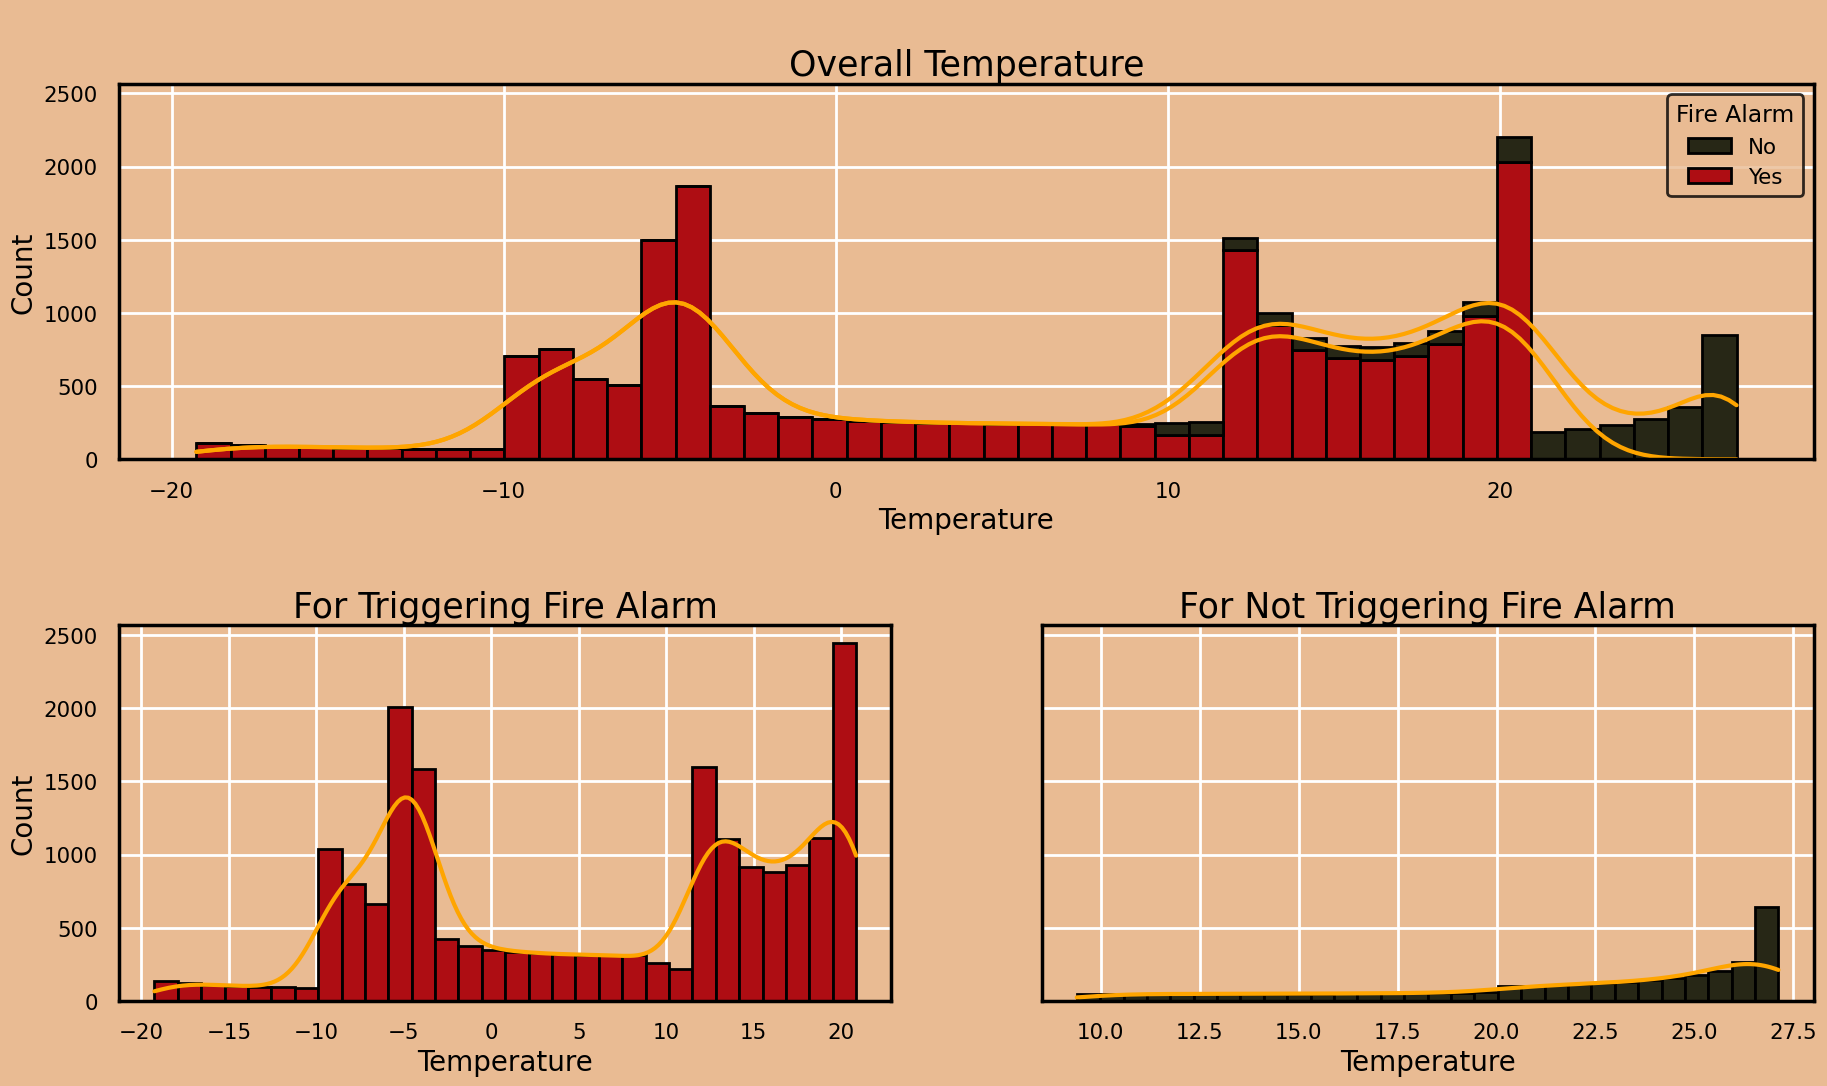

In [12]:
print(f"Let's have a look on the distribution of temperature :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="Temperature",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=True,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].lines[0].set_color("orange")
axs["00"].lines[1].set_color("orange")
axs["00"].set_title("\nOverall Temperature",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("Temperature",fontsize=20)
axs["00"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="Temperature",ax=axs["10"],color=palette[2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].lines[0].set_color("orange")
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("Temperature",fontsize=20)
axs["10"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="Temperature",ax=axs["11"],color=palette[0],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].lines[0].set_color("orange")
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("Temperature",fontsize=20)
axs["11"].set_yscale("linear")

plt.show()

Let's have a look on the distribution of effectiveness-wise temperature analysis :


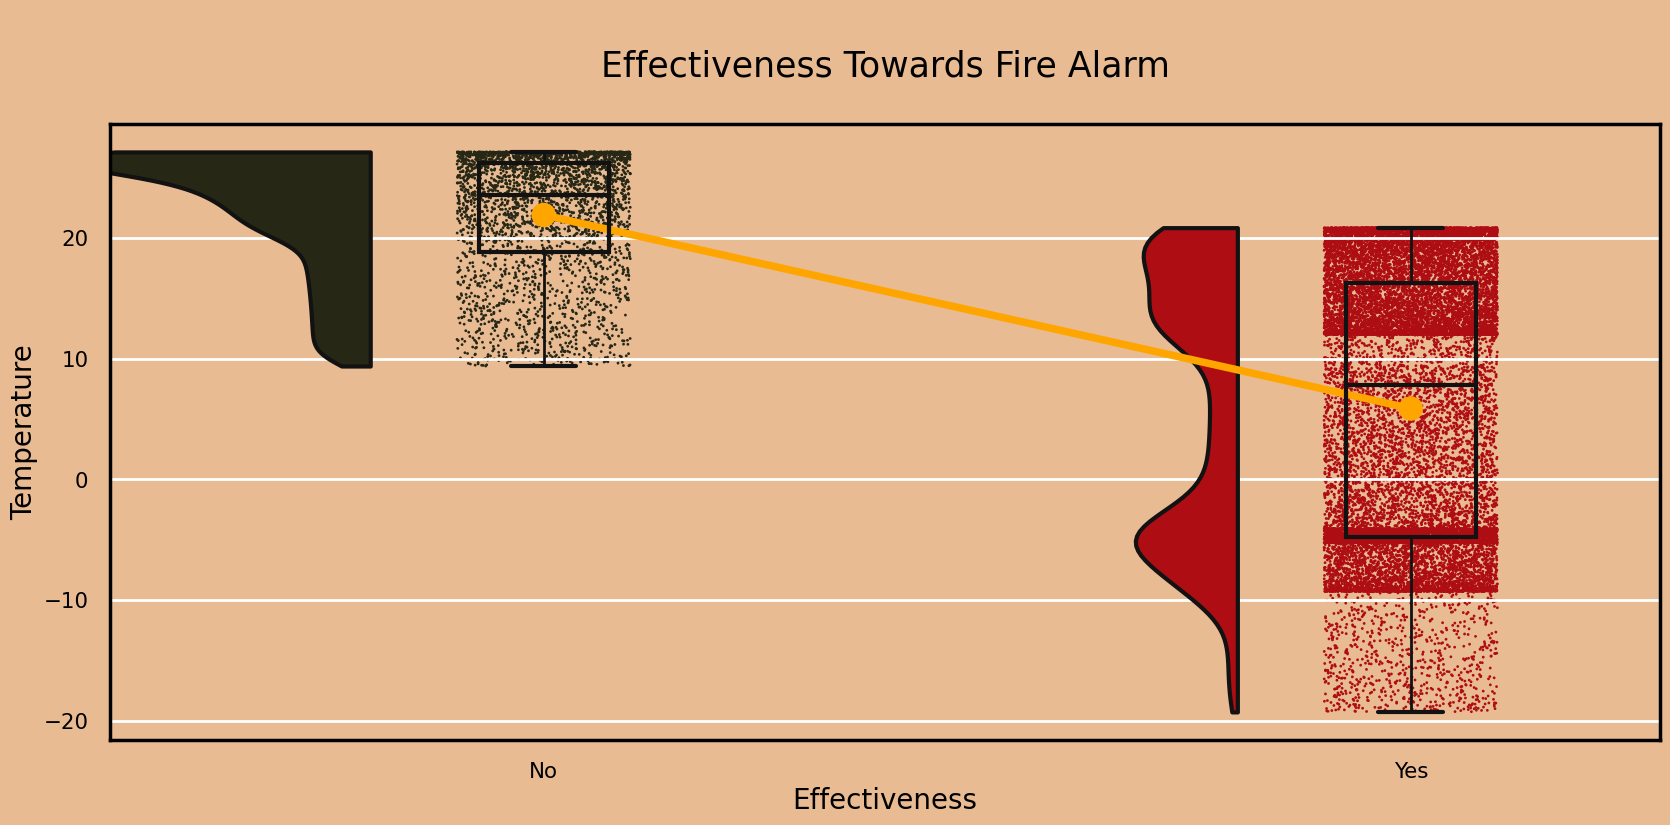

In [13]:
print("Let's have a look on the distribution of effectiveness-wise temperature analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["Temperature"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Temperature",fontsize=20)

plt.show()

Let's have a look on the distribution of humidity :


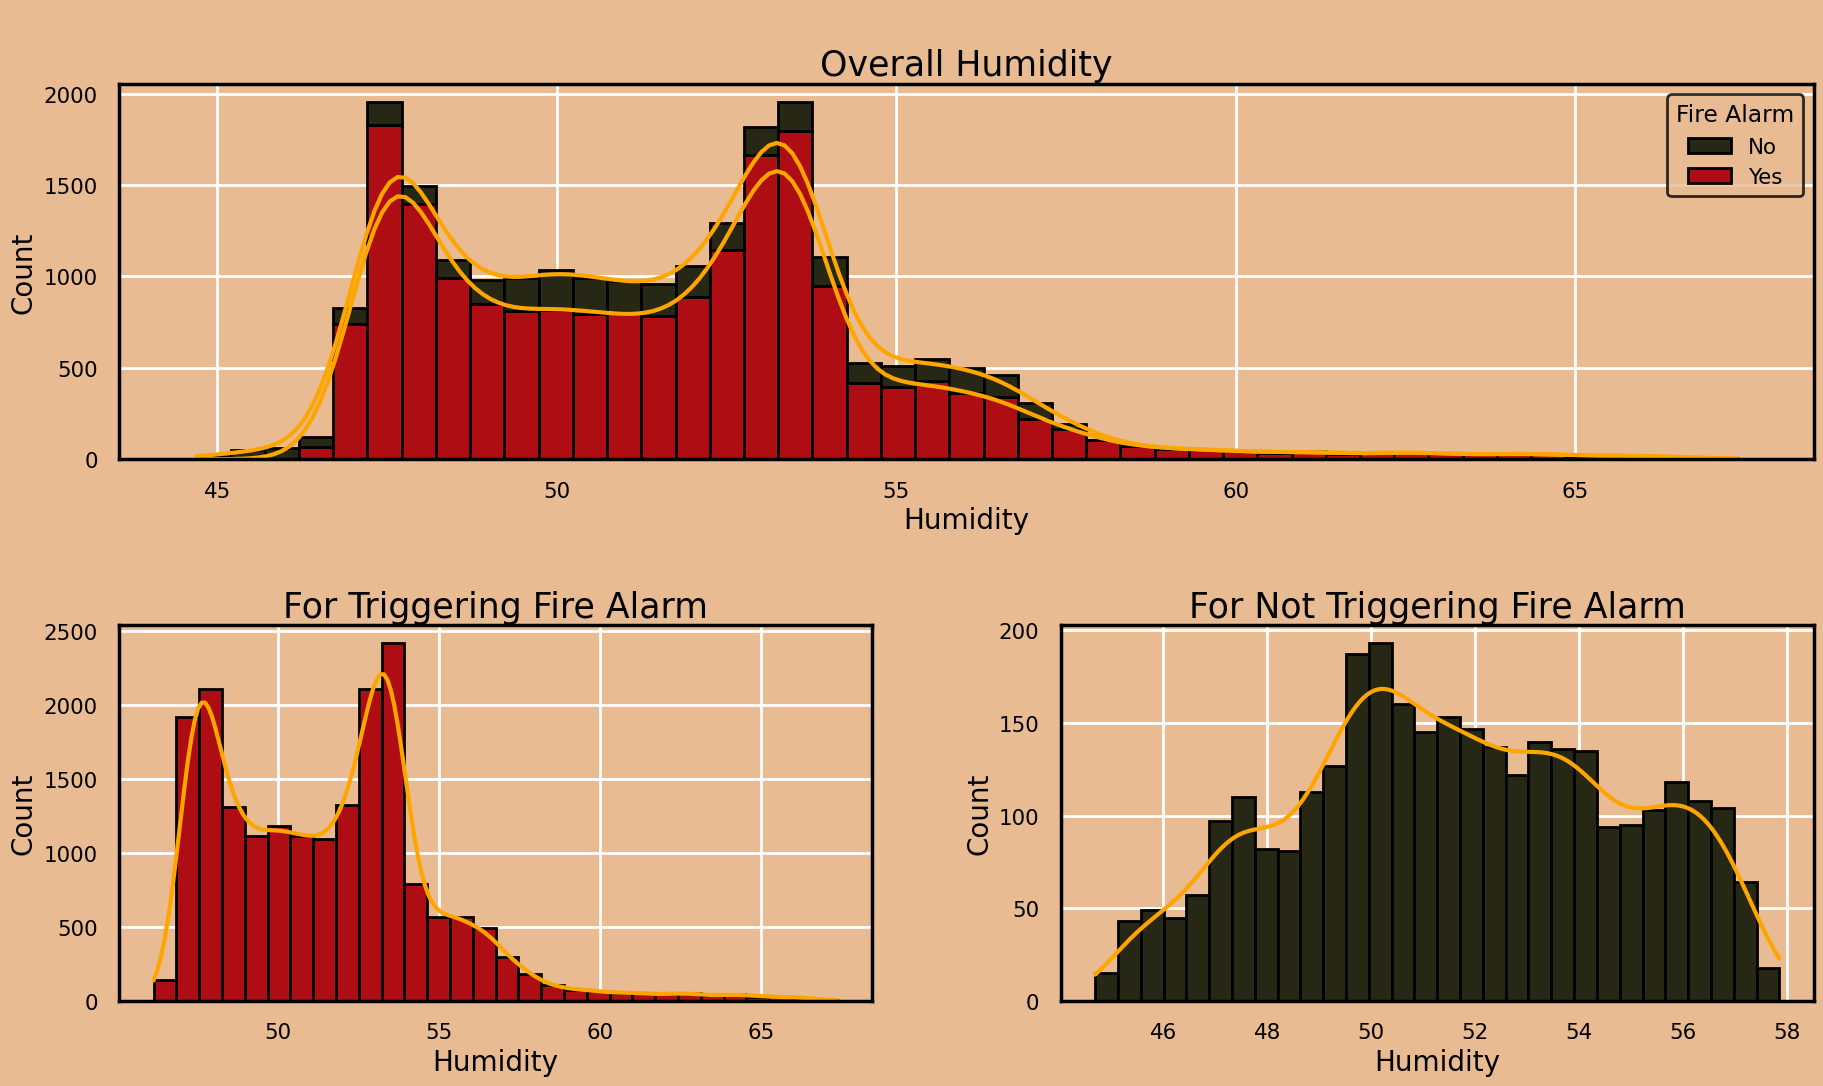

In [14]:
print(f"Let's have a look on the distribution of humidity :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=False)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="Humidity",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=True,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].lines[0].set_color("orange")
axs["00"].lines[1].set_color("orange")
axs["00"].set_title("\nOverall Humidity",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("Humidity",fontsize=20)
axs["00"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="Humidity",ax=axs["10"],color=palette[2],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].lines[0].set_color("orange")
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("Humidity",fontsize=20)
axs["10"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="Humidity",ax=axs["11"],color=palette[0],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].lines[0].set_color("orange")
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("Humidity",fontsize=20)
axs["11"].set_yscale("linear")

plt.show()

Let's have a look on the distribution of effectiveness-wise humidity analysis :


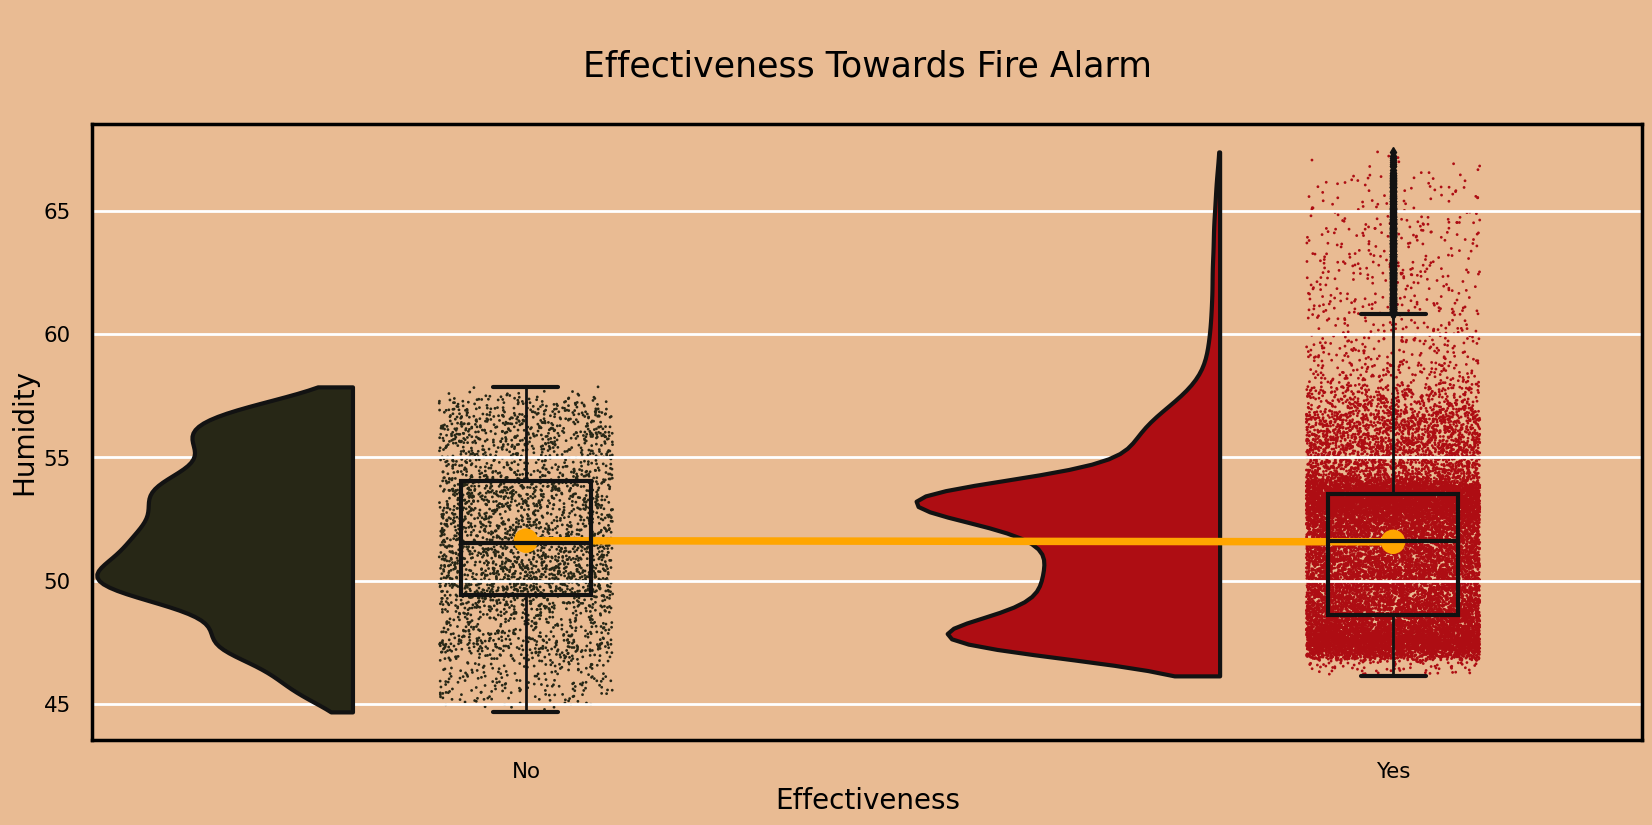

In [15]:
print("Let's have a look on the distribution of effectiveness-wise humidity analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["Humidity"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Humidity",fontsize=20)

plt.show()

Let's have a look on the distribution of total volatile organic compounds :


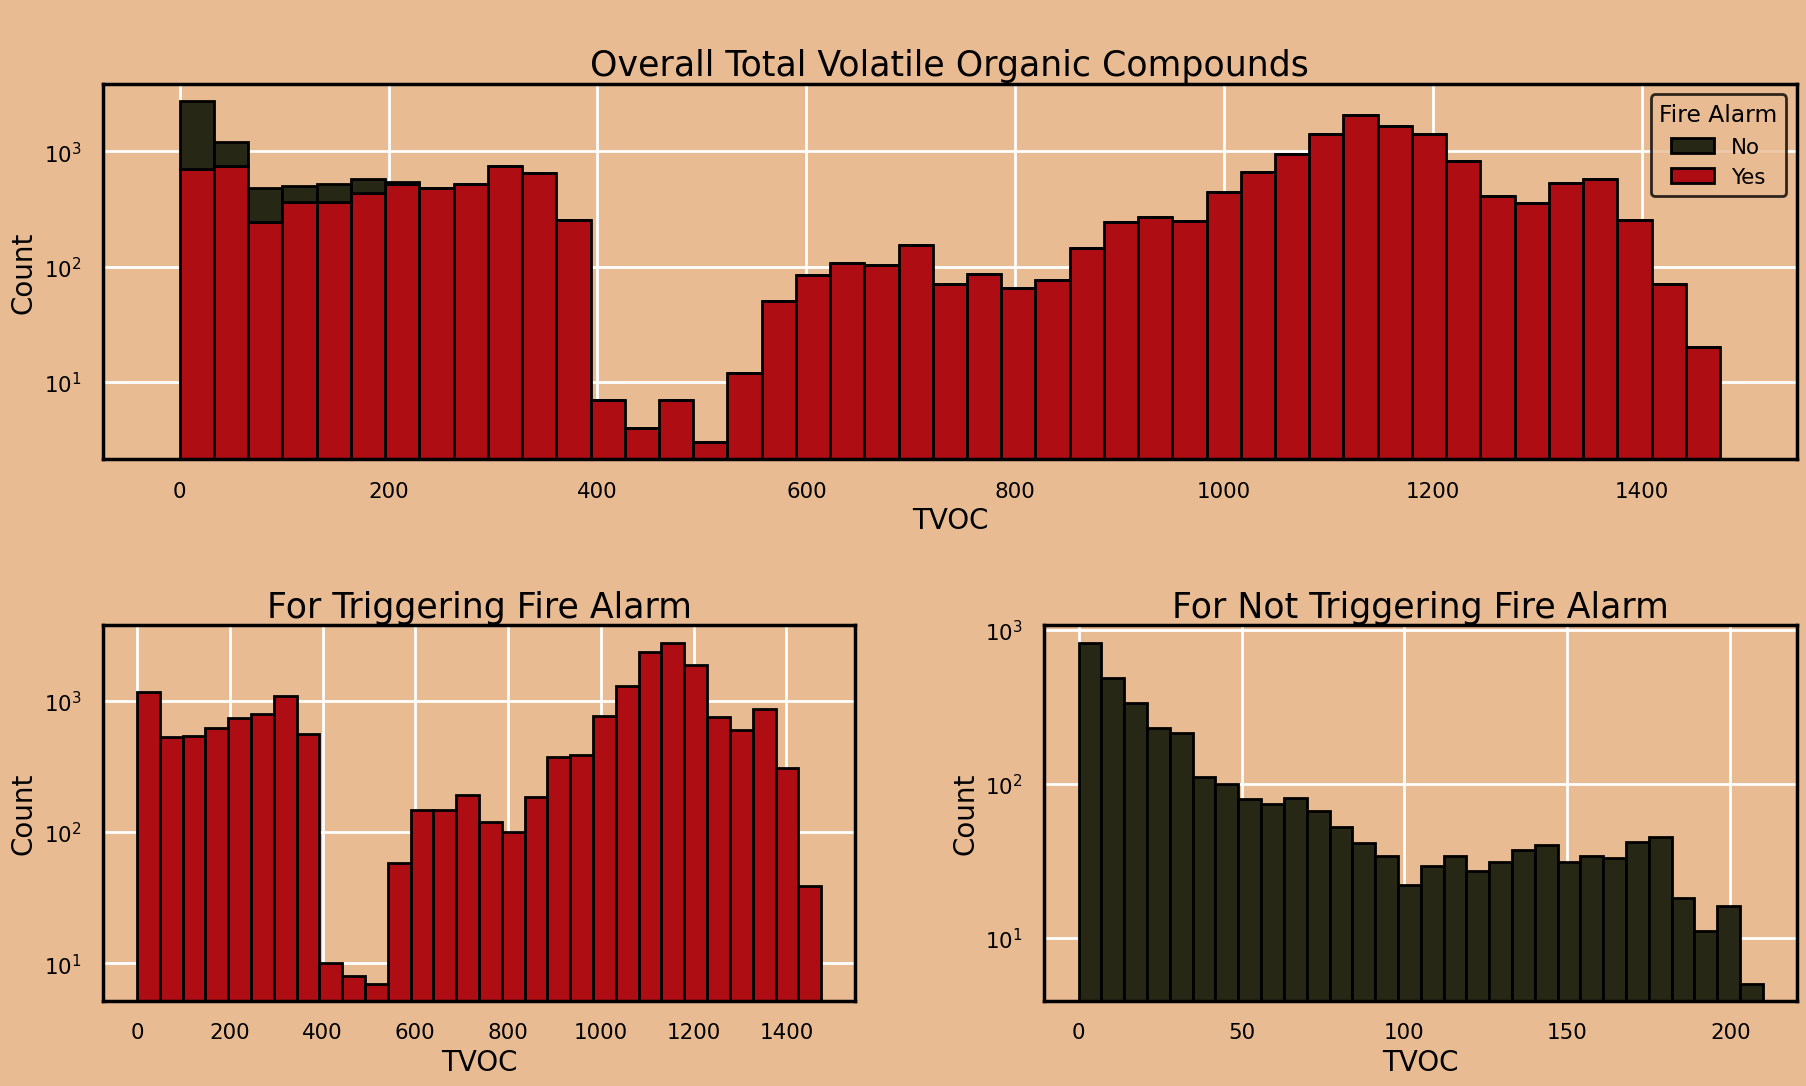

In [16]:
print(f"Let's have a look on the distribution of total volatile organic compounds :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=False)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="TVOC",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].set_title("\nOverall Total Volatile Organic Compounds",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("TVOC",fontsize=20)
axs["00"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="TVOC",ax=axs["10"],color=palette[2],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("TVOC",fontsize=20)
axs["10"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="TVOC",ax=axs["11"],color=palette[0],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("TVOC",fontsize=20)
axs["11"].set_yscale("log")

plt.show()

Let's have a look on the distribution of effectiveness-wise total volatile organic compounds analysis :


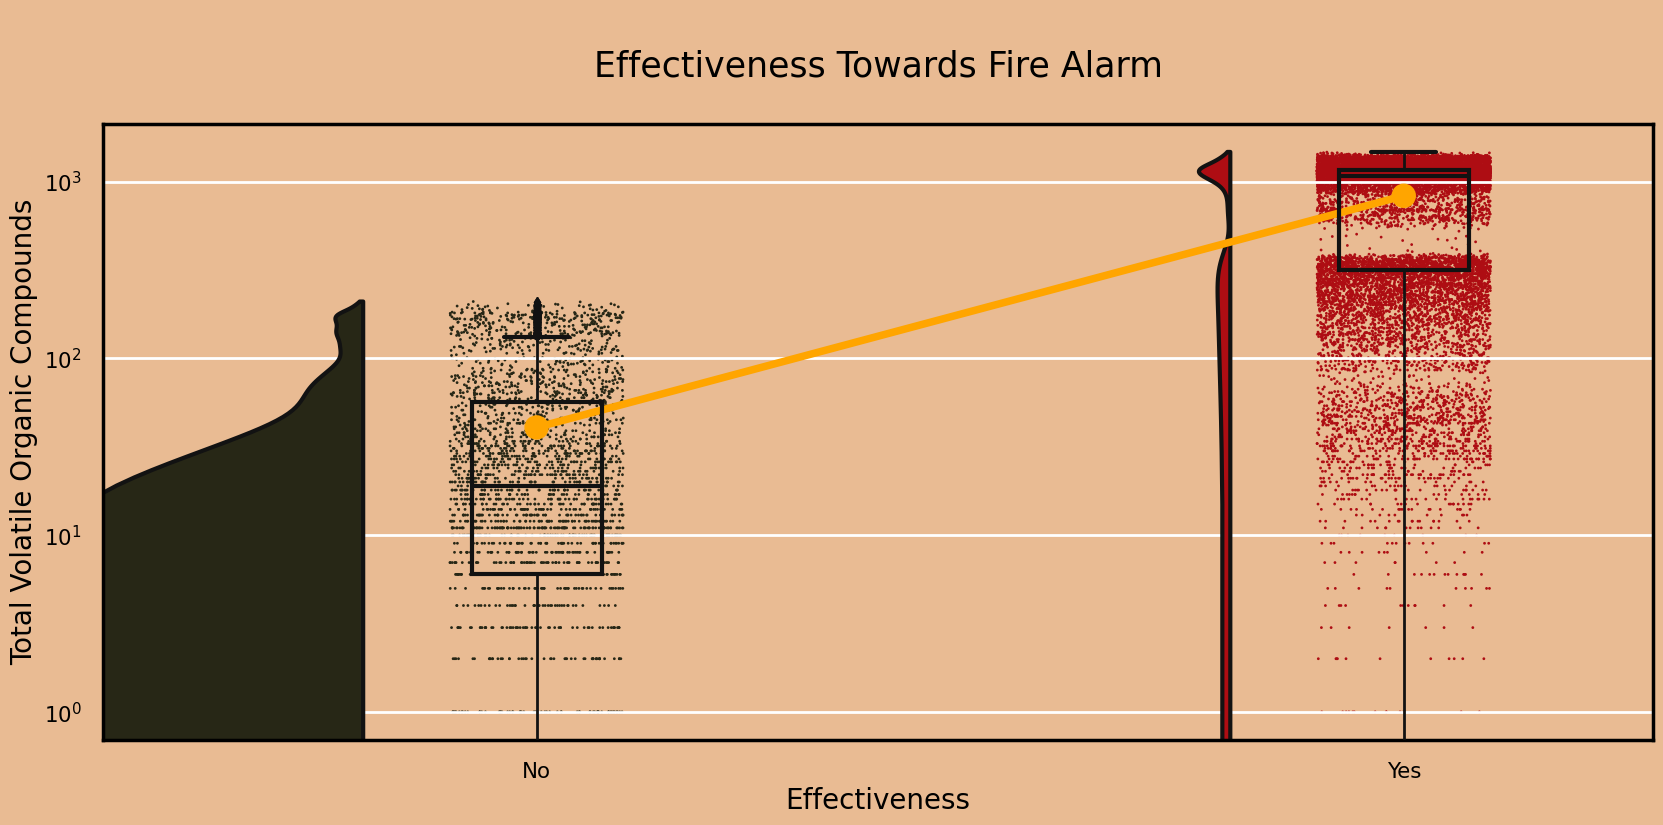

In [17]:
print("Let's have a look on the distribution of effectiveness-wise total volatile organic compounds analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["TVOC"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Total Volatile Organic Compounds",fontsize=20)
p.axes.set_yscale("log")

plt.show()

Let's have a look on the distribution of CO2 equivalent concentration :


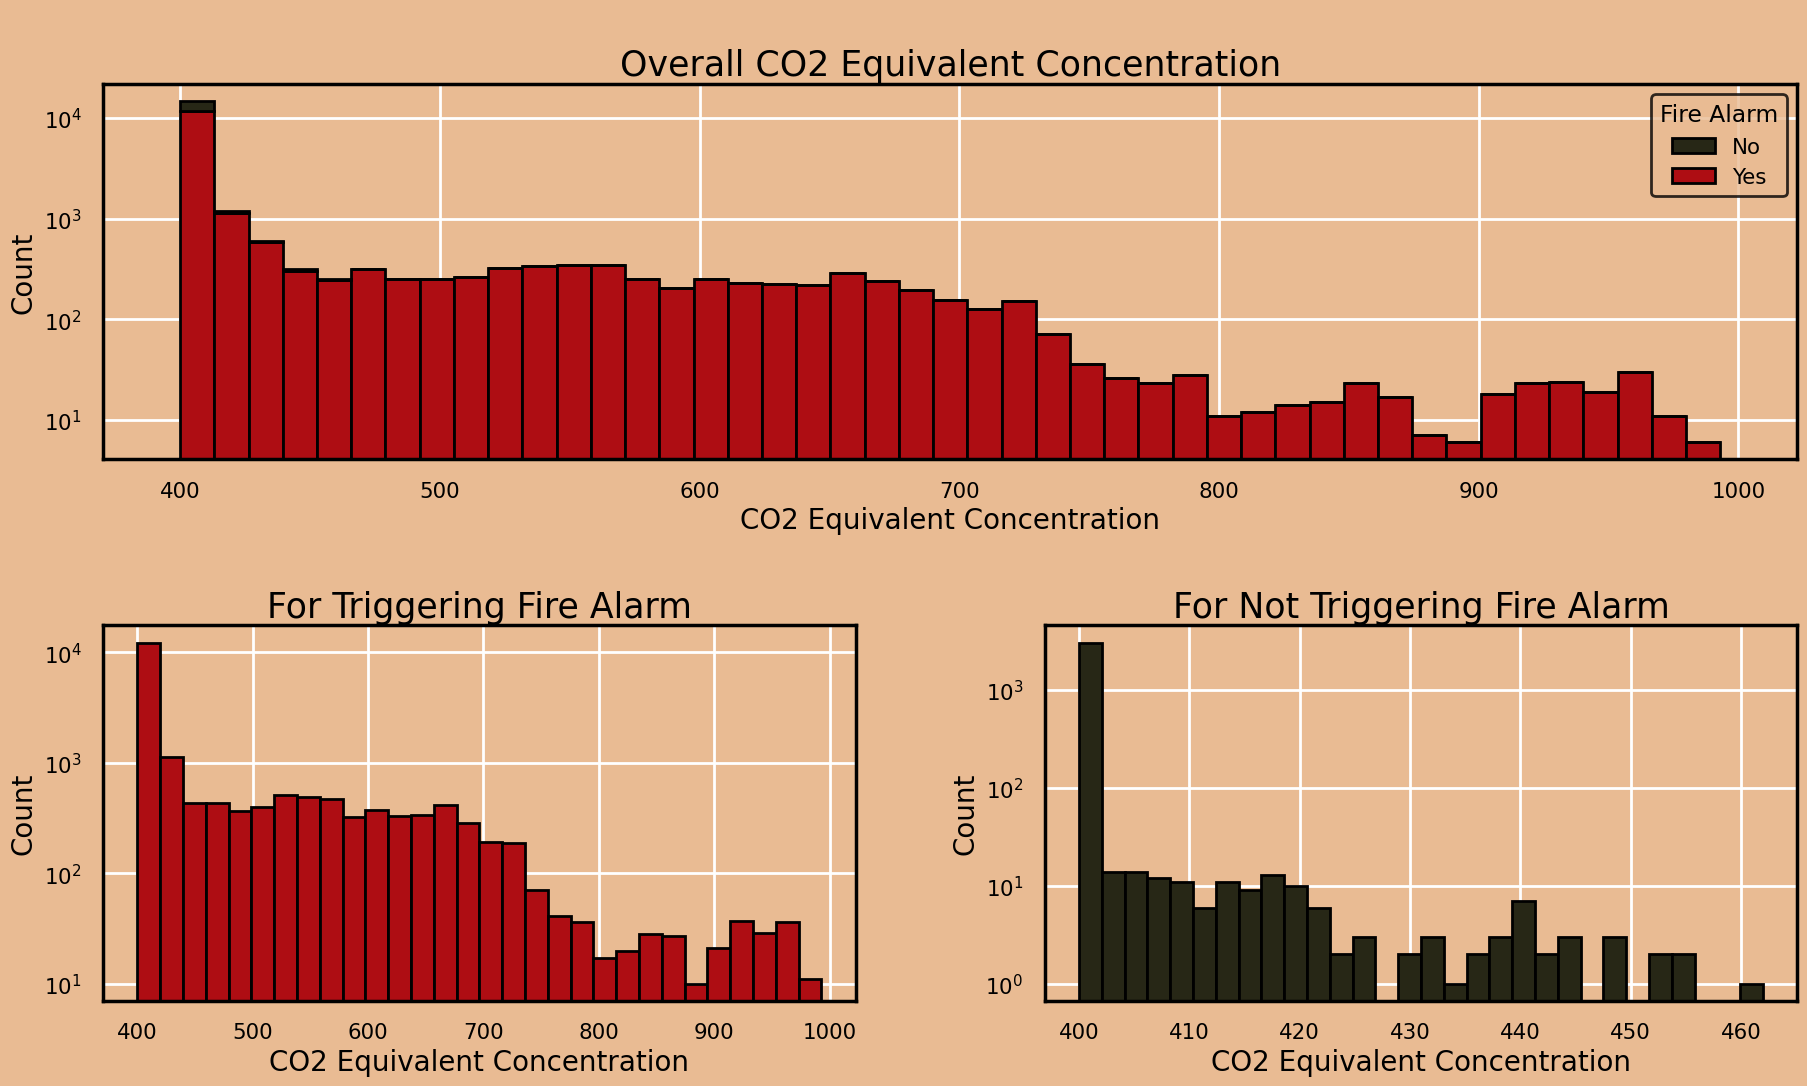

In [18]:
print(f"Let's have a look on the distribution of CO2 equivalent concentration :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=False)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="eCO2",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].set_title("\nOverall CO2 Equivalent Concentration",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("CO2 Equivalent Concentration",fontsize=20)
axs["00"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="eCO2",ax=axs["10"],color=palette[2],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("CO2 Equivalent Concentration",fontsize=20)
axs["10"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="eCO2",ax=axs["11"],color=palette[0],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("CO2 Equivalent Concentration",fontsize=20)
axs["11"].set_yscale("log")

plt.show()

Let's have a look on the distribution of effectiveness-wise CO2 equivalent concentration analysis :


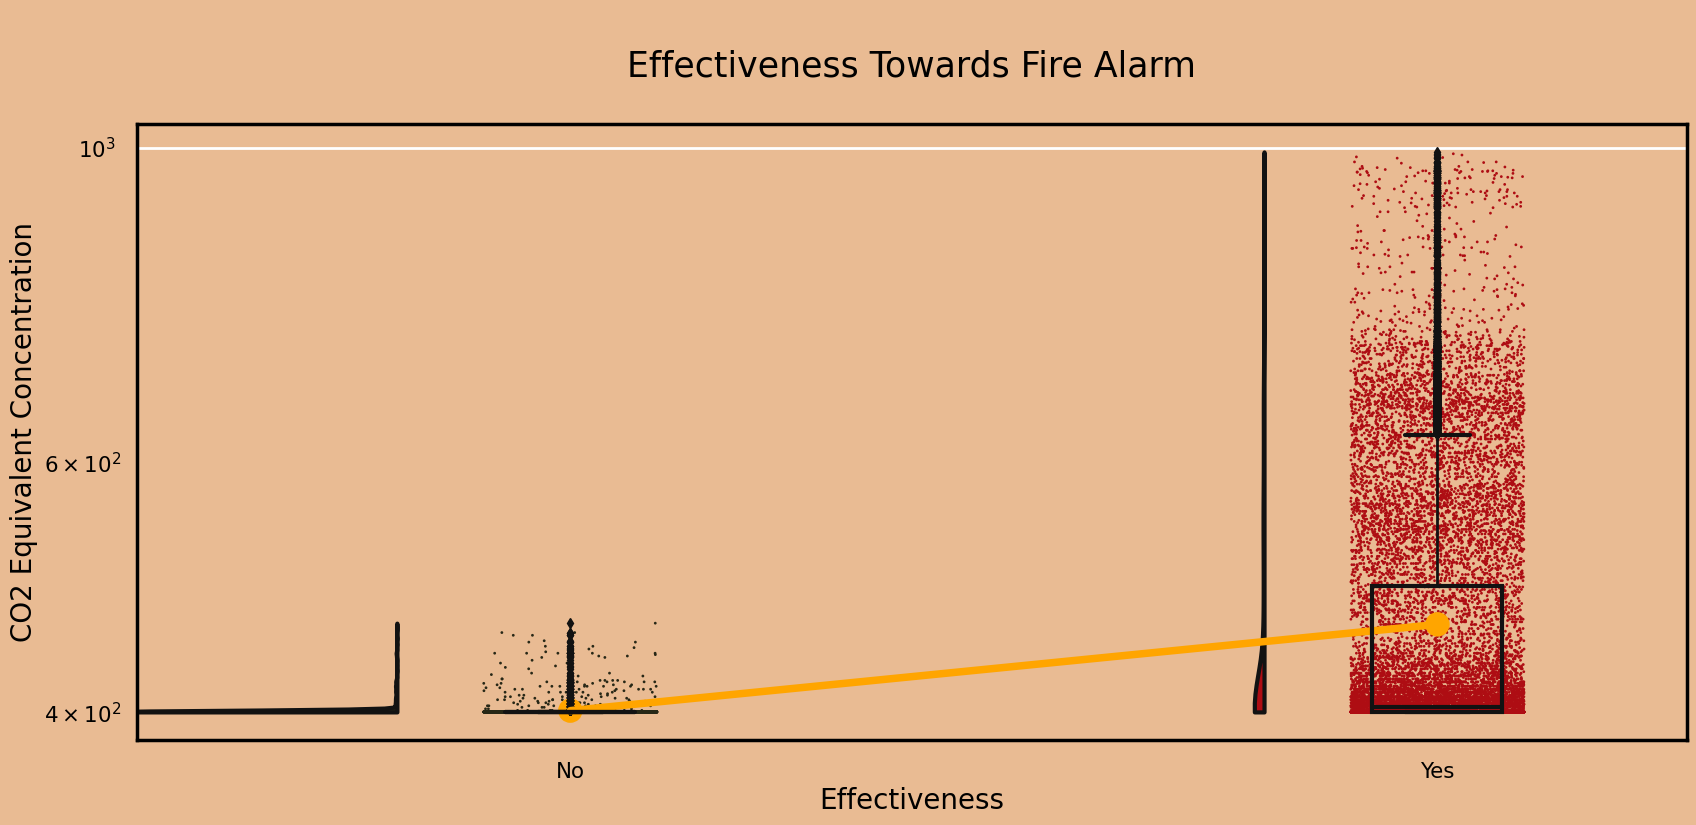

In [19]:
print("Let's have a look on the distribution of effectiveness-wise CO2 equivalent concentration analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["eCO2"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("CO2 Equivalent Concentration",fontsize=20)
p.axes.set_yscale("log")

plt.show()

Let's have a look on the distribution of raw hydrogen :


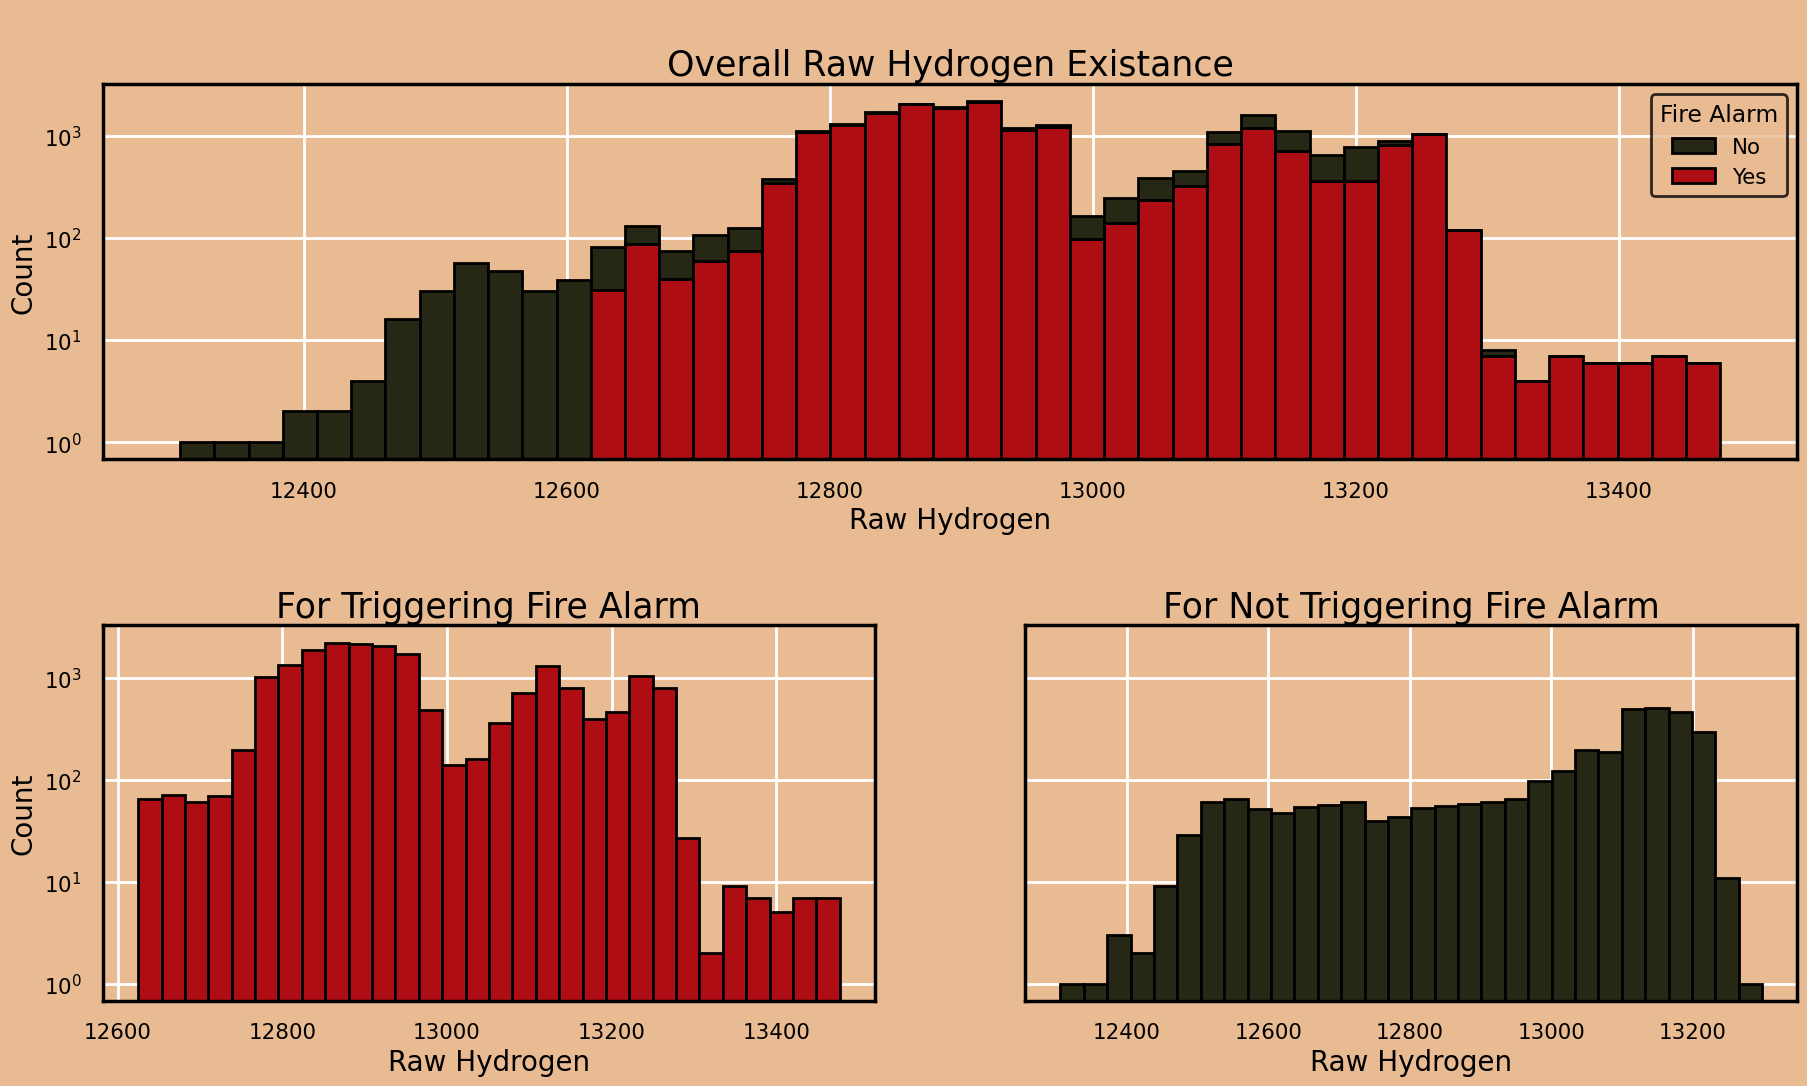

In [20]:
print(f"Let's have a look on the distribution of raw hydrogen :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="Raw H2",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].set_title("\nOverall Raw Hydrogen Existance",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("Raw Hydrogen",fontsize=20)
axs["00"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="Raw H2",ax=axs["10"],color=palette[2],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("Raw Hydrogen",fontsize=20)
axs["10"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="Raw H2",ax=axs["11"],color=palette[0],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("Raw Hydrogen",fontsize=20)
axs["11"].set_yscale("log")

plt.show()

In [ ]:
print("Let's have a look on the distribution of effectiveness-wise raw hydrogen existance analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["Raw H2"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Raw Hydrogen",fontsize=20)
p.axes.set_yscale("linear")

plt.show()

Let's have a look on the distribution of effectiveness-wise raw hydrogen existance analysis :


Let's have a look on the distribution of raw ethanol :


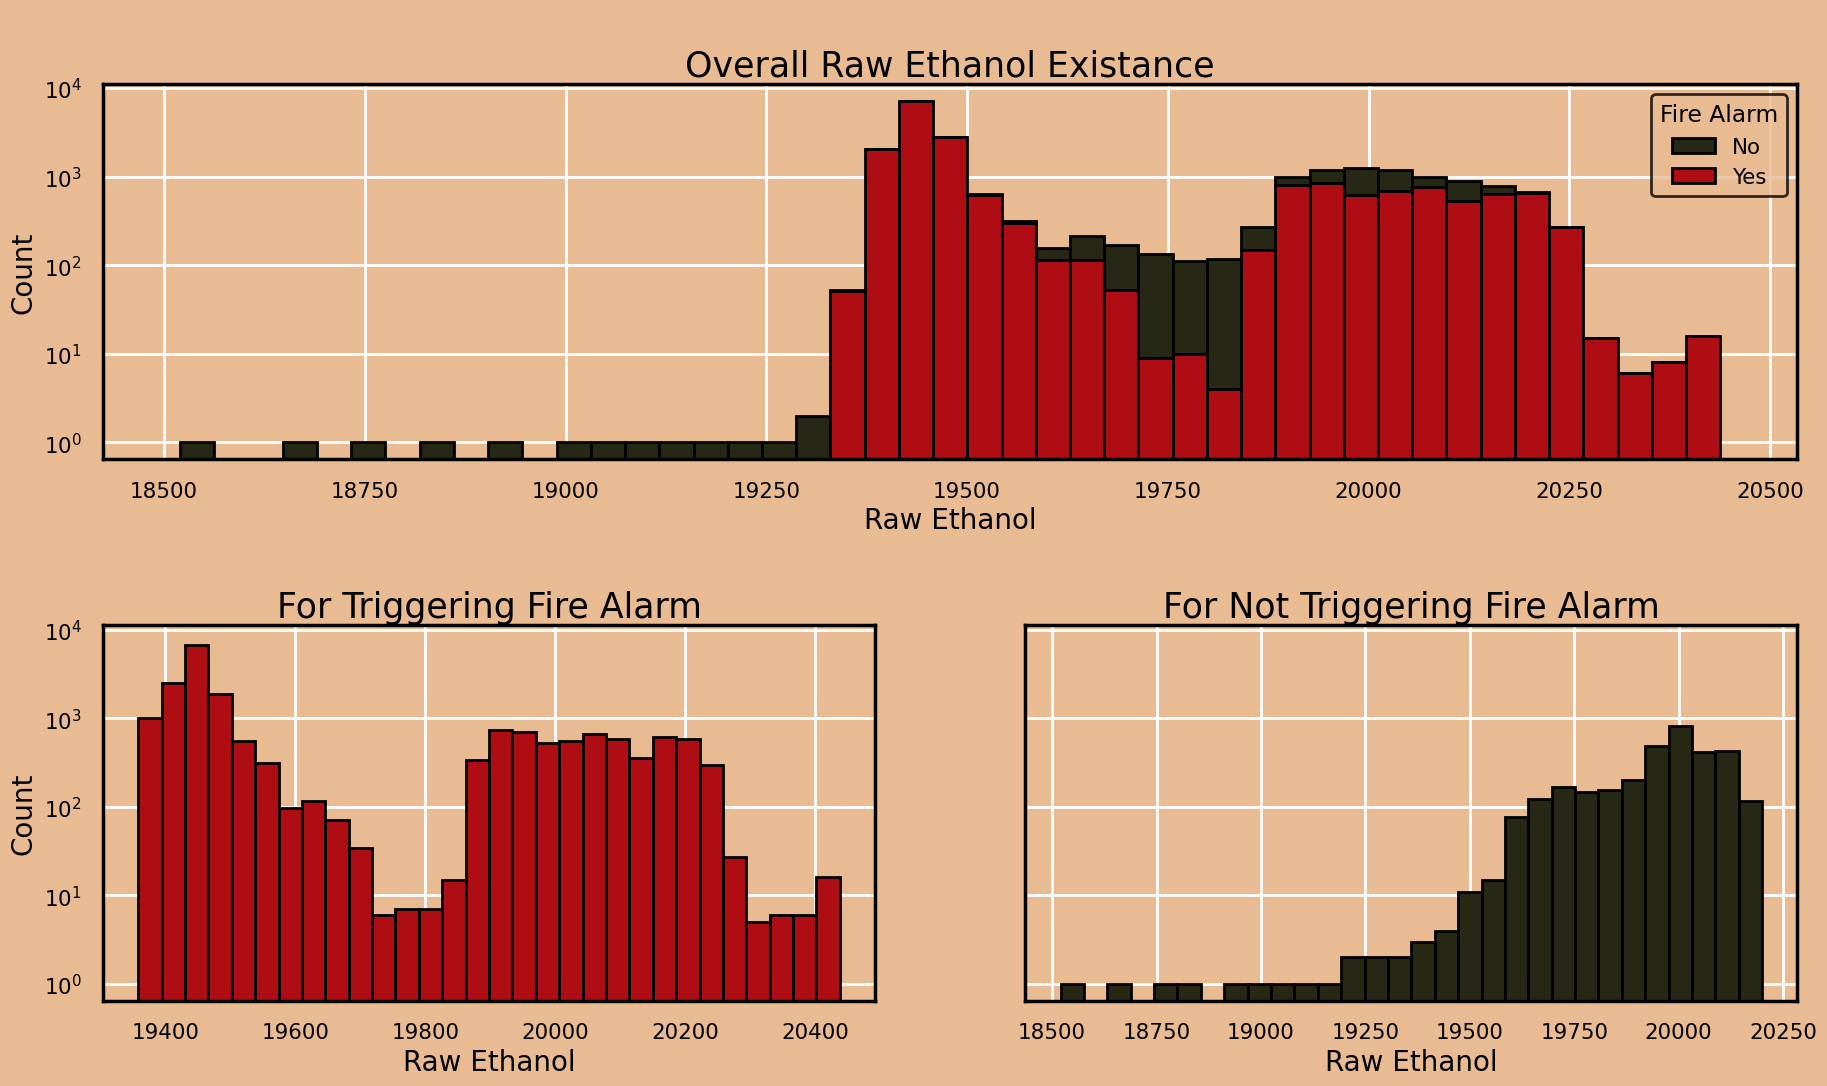

In [22]:
print(f"Let's have a look on the distribution of raw ethanol :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="Raw Ethanol",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].set_title("\nOverall Raw Ethanol Existance",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("Raw Ethanol",fontsize=20)
axs["00"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="Raw Ethanol",ax=axs["10"],color=palette[2],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("Raw Ethanol",fontsize=20)
axs["10"].set_yscale("log")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="Raw Ethanol",ax=axs["11"],color=palette[0],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("Raw Ethanol",fontsize=20)
axs["11"].set_yscale("log")

plt.show()

Let's have a look on the distribution of effectiveness-wise raw ethanol existance analysis :


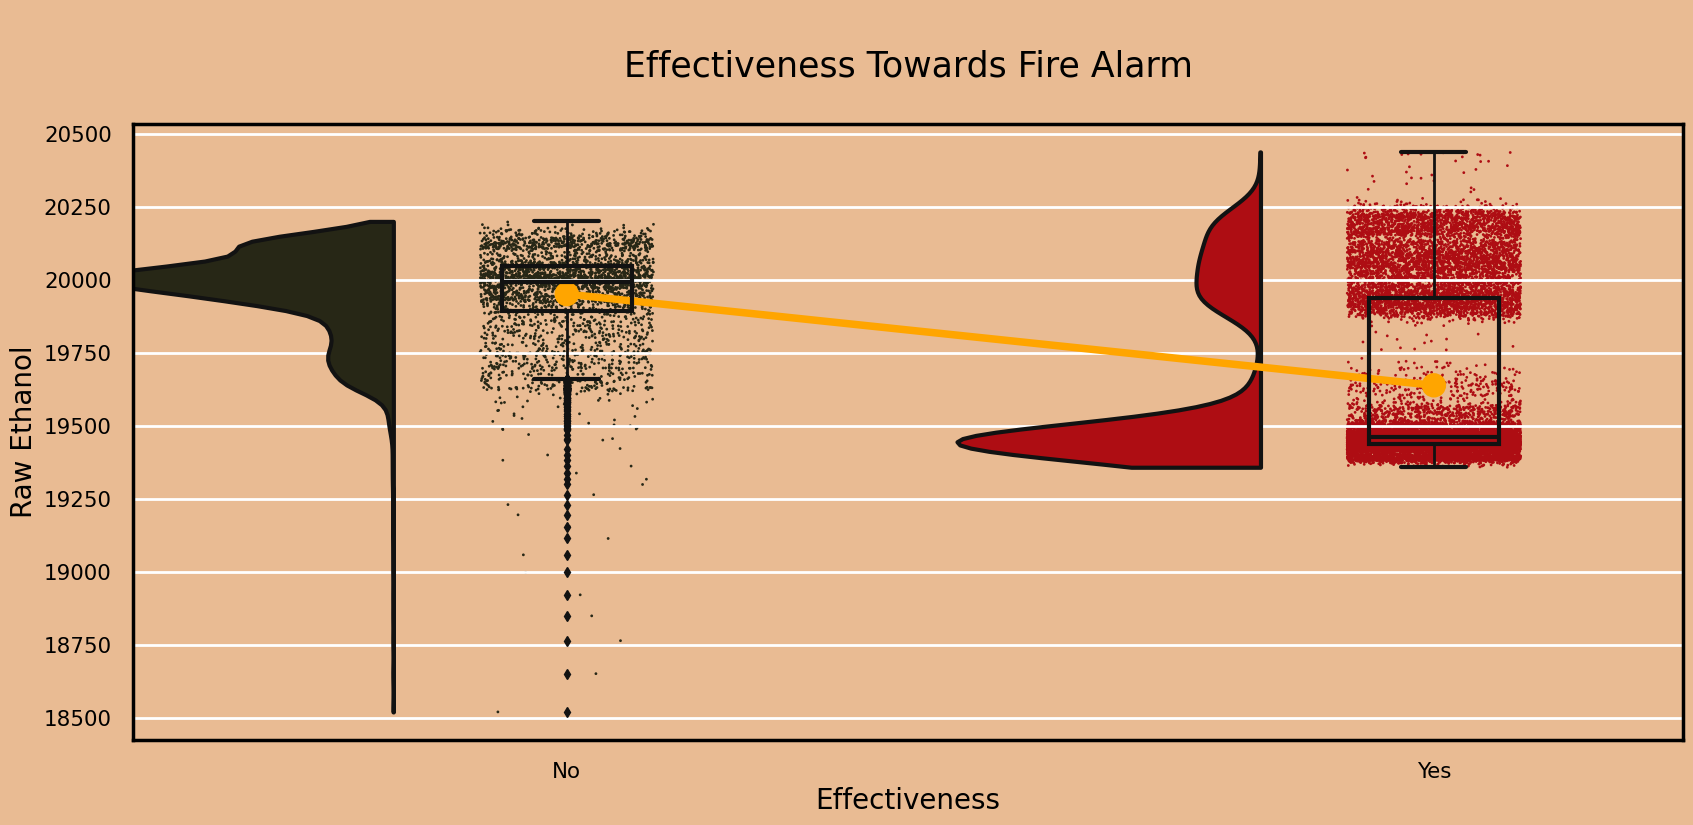

In [23]:
print("Let's have a look on the distribution of effectiveness-wise raw ethanol existance analysis :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["Raw Ethanol"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Raw Ethanol",fontsize=20)
p.axes.set_yscale("linear")

plt.show()

Let's have a look on the distribution of air pressure :


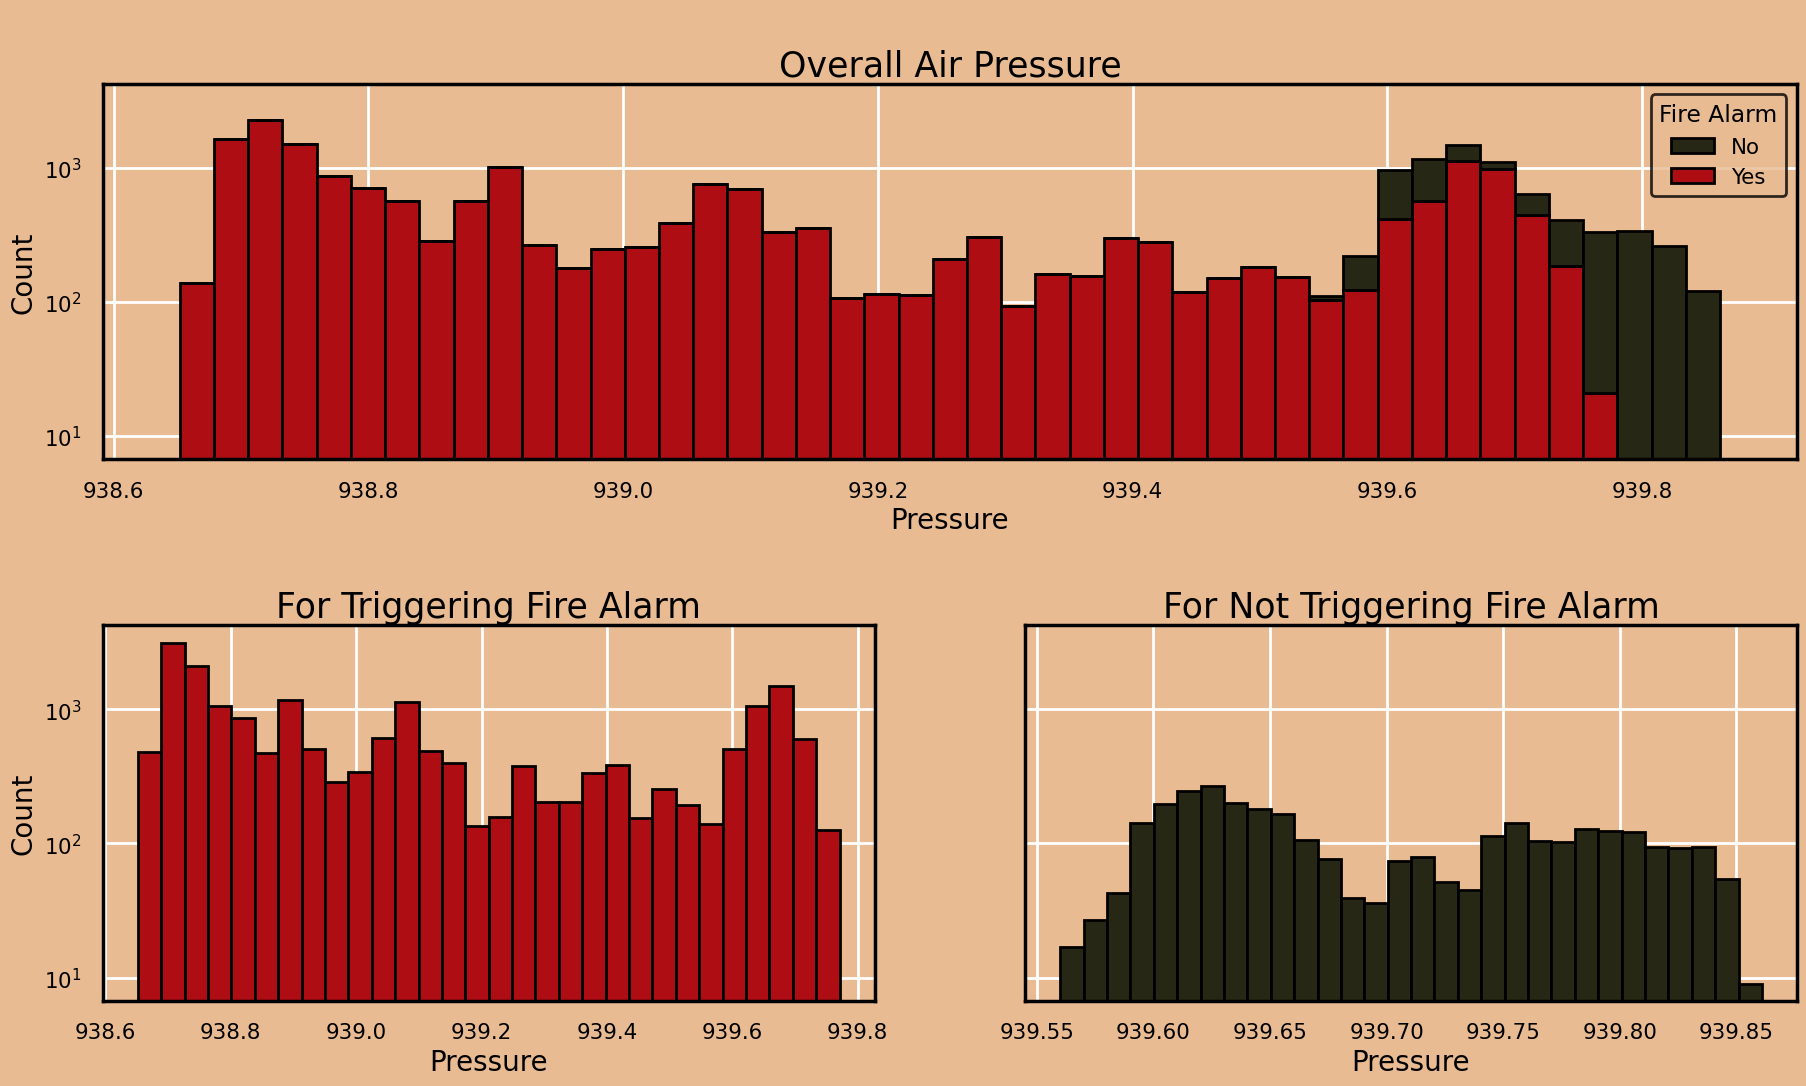

In [24]:
print(f"Let's have a look on the distribution of air pressure :")
_, axs = plt.subplot_mosaic([["00", "00"],
                            ["10", "11"]],figsize=(20,12), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="Pressure",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs["00"],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["00"].set_title("\nOverall Air Pressure",fontsize=25)
axs["00"].set_ylabel("Count",fontsize=20)
axs["00"].set_xlabel("Pressure",fontsize=20)
axs["00"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="Yes"],x="Pressure",ax=axs["10"],color=palette[2],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["10"].set_title("\nFor Triggering Fire Alarm",fontsize=25)
axs["10"].set_ylabel("Count",fontsize=20)
axs["10"].set_xlabel("Pressure",fontsize=20)
axs["10"].set_yscale("linear")

sns.histplot(data=data[data["Fire Alarm"]=="No"],x="Pressure",ax=axs["11"],color=palette[0],kde=False,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs["11"].set_title("\nFor Not Triggering Fire Alarm",fontsize=25)
axs["11"].set_ylabel("Count",fontsize=20)
axs["11"].set_xlabel("Pressure",fontsize=20)
axs["11"].set_yscale("log")

plt.show()

Let's have a look on the distribution of effectiveness-wise air pressure :


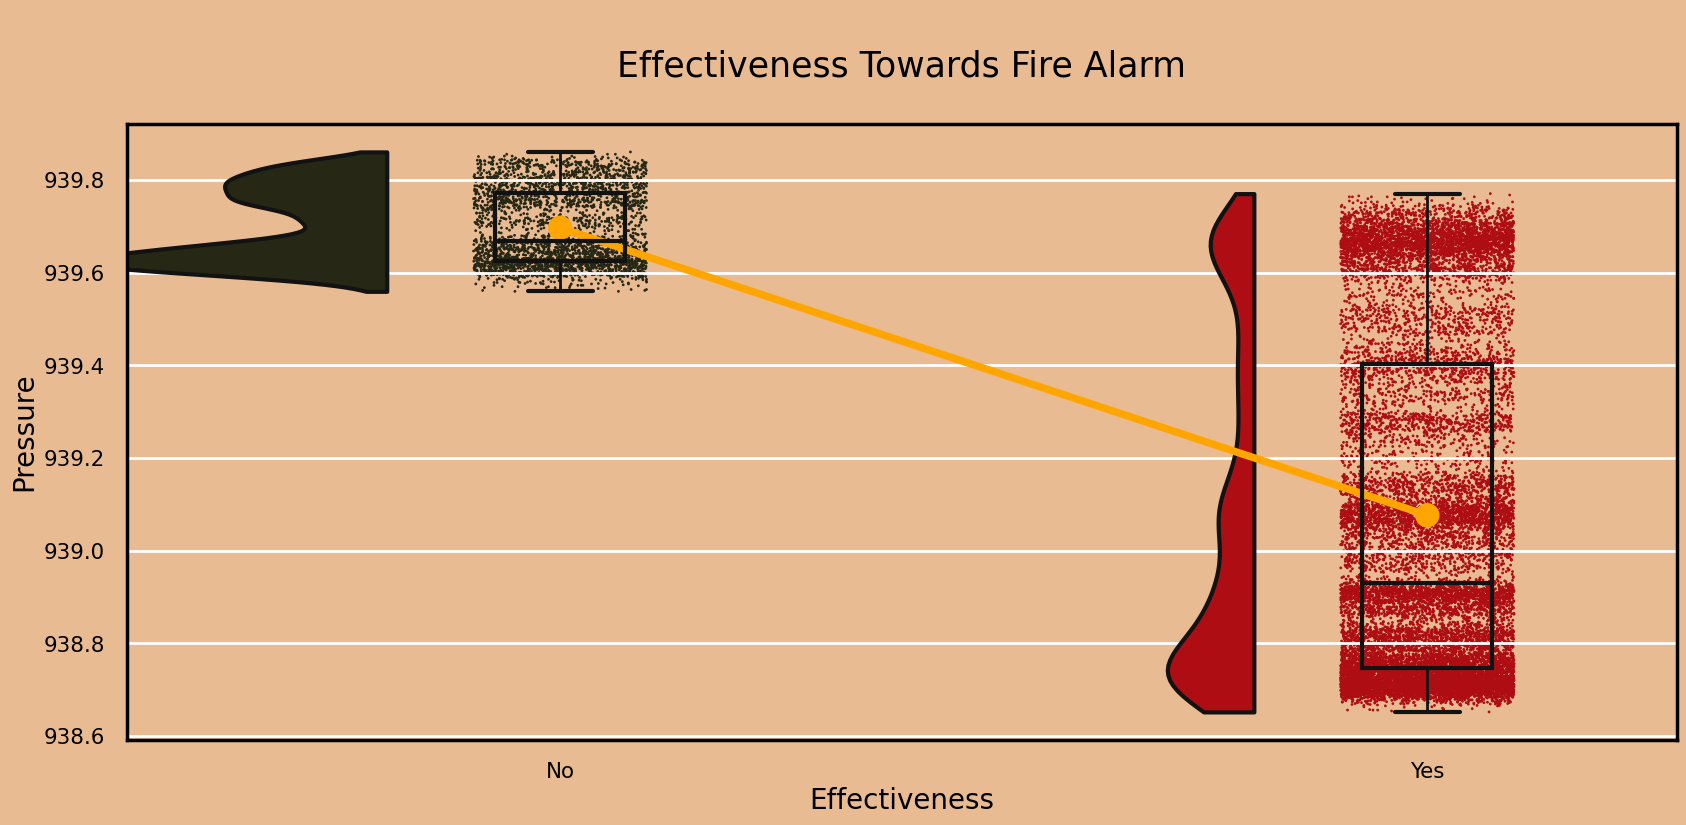

In [25]:
print("Let's have a look on the distribution of effectiveness-wise air pressure :")
plt.subplots(figsize=(20, 8))

p=pt.RainCloud(data=data,x=data["Fire Alarm"],y=data["Pressure"],order=data["Fire Alarm"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=2,palette=palette[0:3:2],saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nEffectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Pressure",fontsize=20)
p.axes.set_yscale("linear")

plt.show()

Let's have a look on the distribution of particulate matter values :


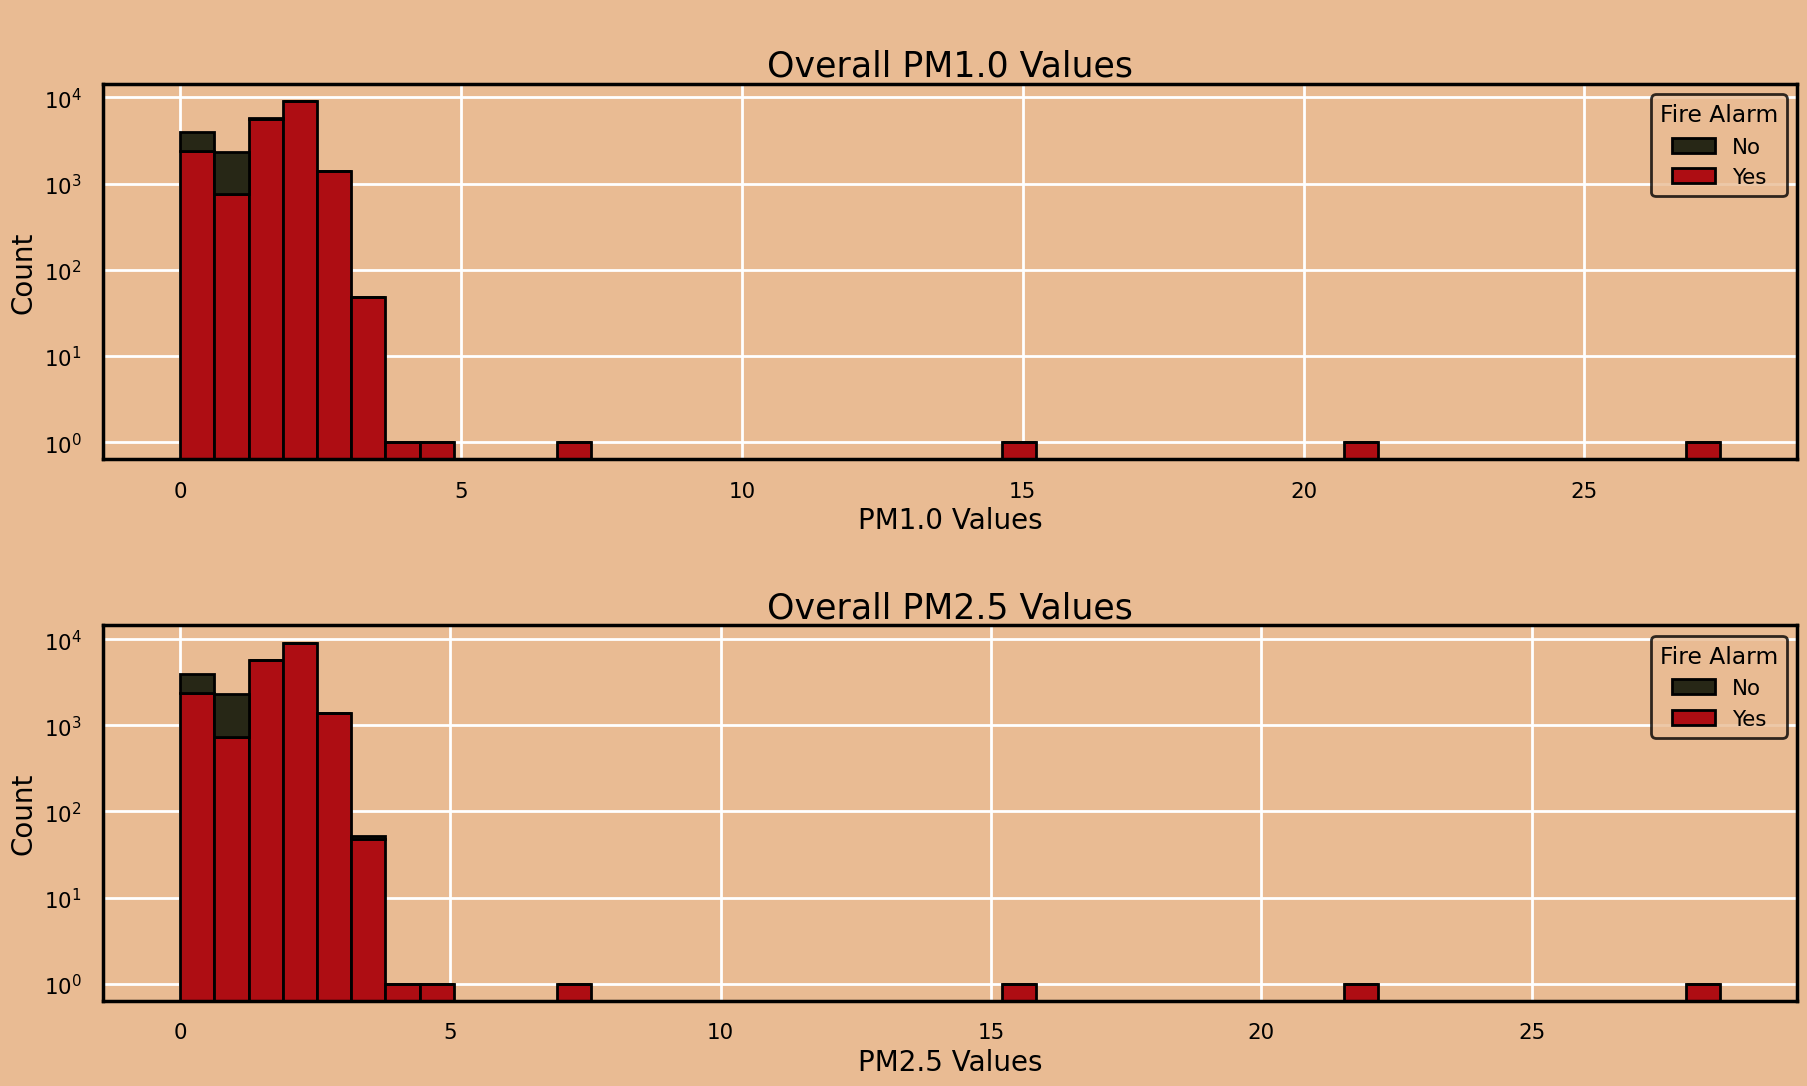

In [26]:
print(f"Let's have a look on the distribution of particulate matter values :")
_, axs = plt.subplots(2,1,figsize=(20,12), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="PM1.0",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[0],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[0].set_title("\nOverall PM1.0 Values",fontsize=25)
axs[0].set_ylabel("Count",fontsize=20)
axs[0].set_xlabel("PM1.0 Values",fontsize=20)
axs[0].set_yscale("linear")

sns.histplot(data=data,x="PM2.5",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[1],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[1].set_title("\nOverall PM2.5 Values",fontsize=25)
axs[1].set_ylabel("Count",fontsize=20)
axs[1].set_xlabel("PM2.5 Values",fontsize=20)
axs[1].set_yscale("log")

plt.show()

Let's have a look on the distribution of the concentration of particulate matter values :


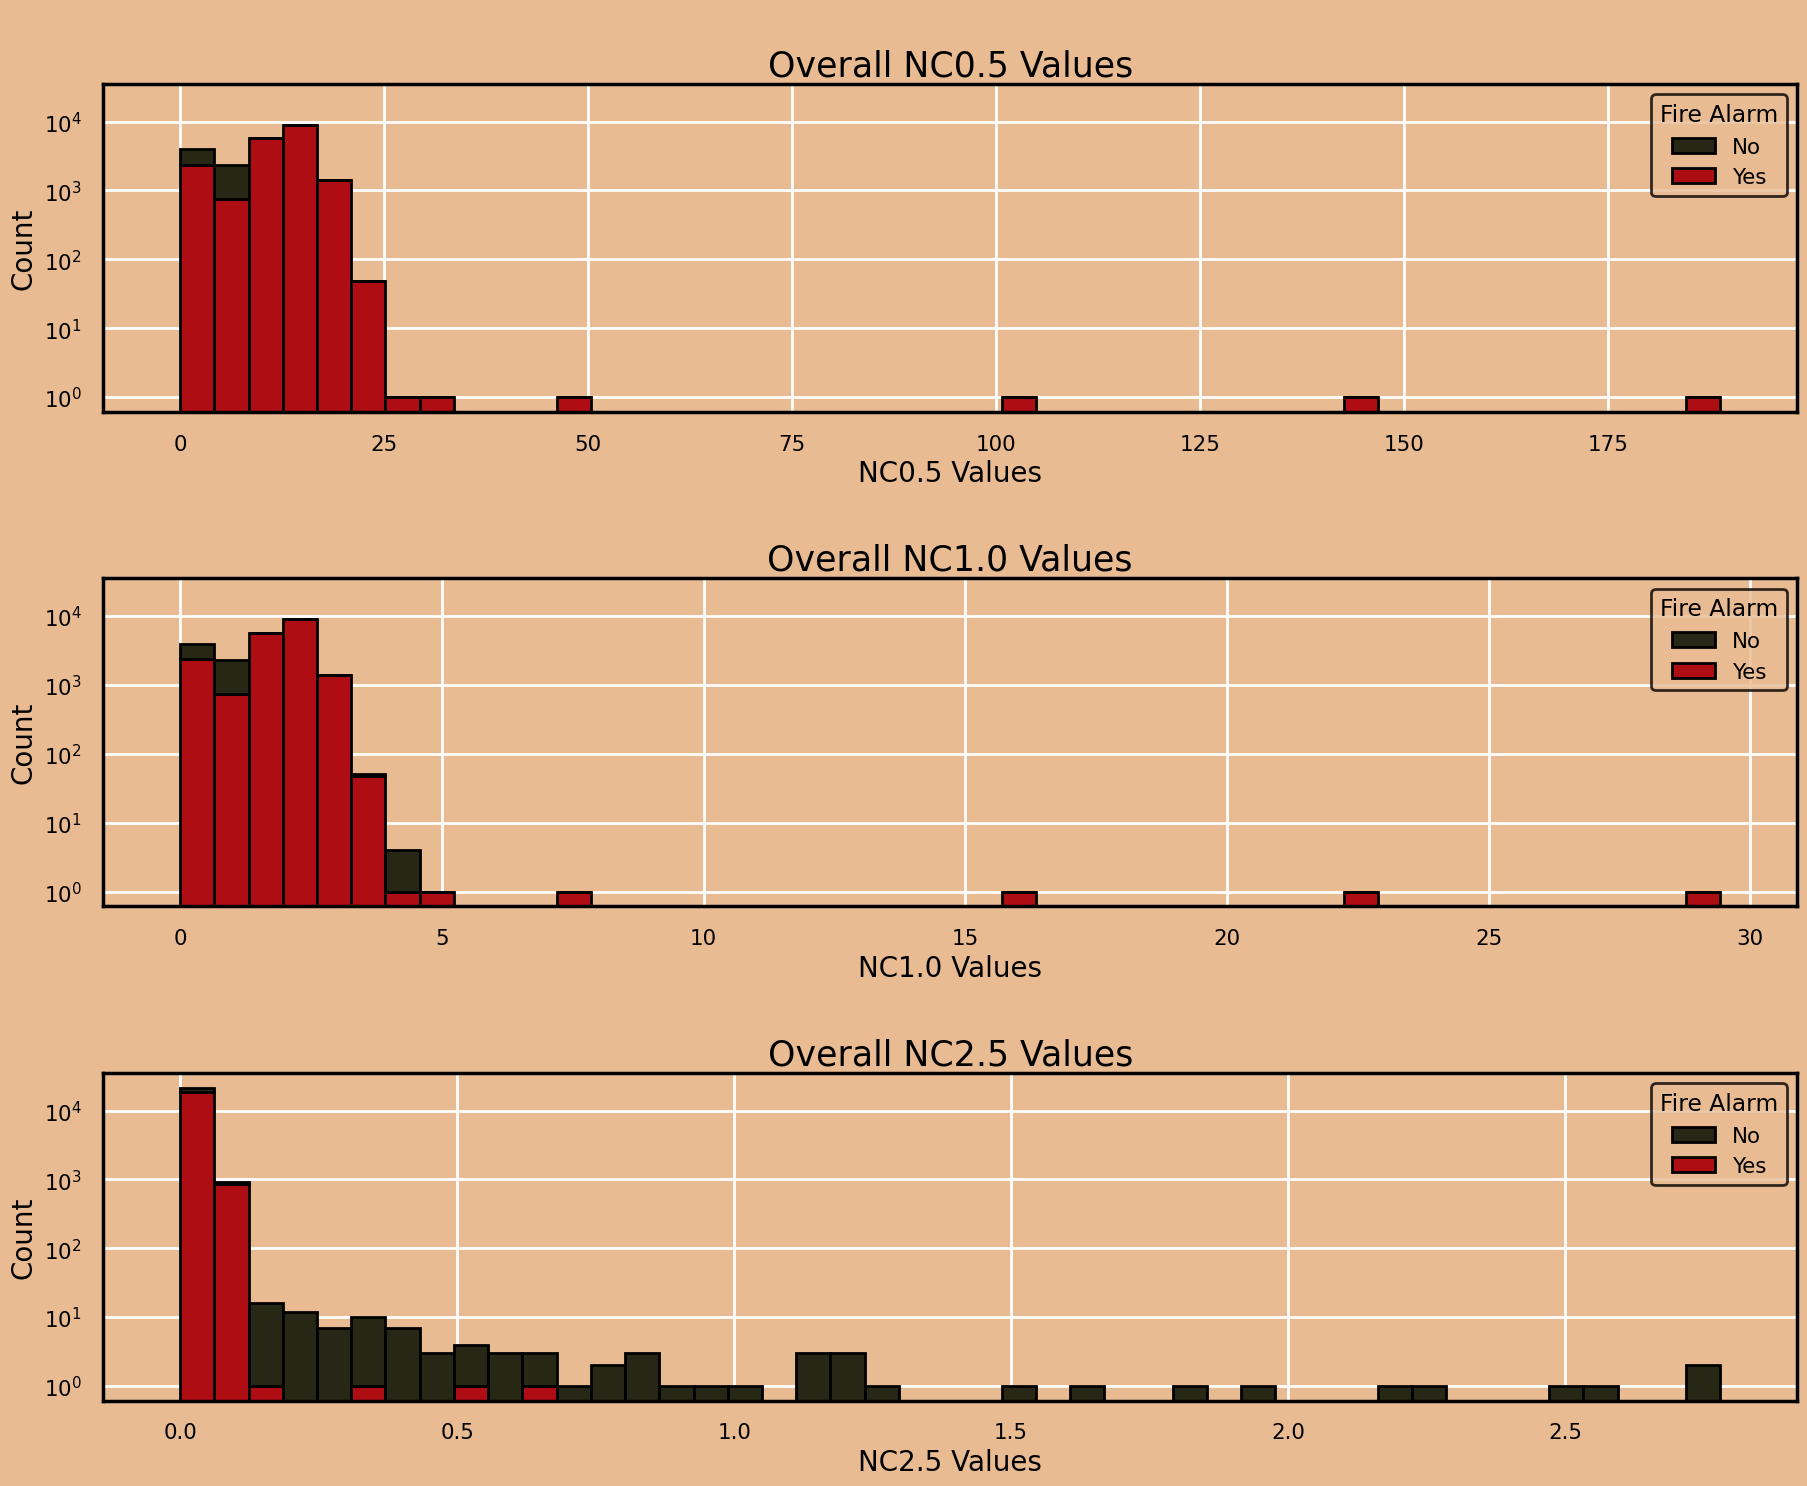

In [27]:
print(f"Let's have a look on the distribution of the concentration of particulate matter values :")
_, axs = plt.subplots(3,1,figsize=(20,16), sharey=True)
plt.tight_layout(pad=5.0)

sns.histplot(data=data,x="NC0.5",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[0],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[0].set_title("\nOverall NC0.5 Values",fontsize=25)
axs[0].set_ylabel("Count",fontsize=20)
axs[0].set_xlabel("NC0.5 Values",fontsize=20)
axs[0].set_yscale("linear")

sns.histplot(data=data,x="NC1.0",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[1],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[1].set_title("\nOverall NC1.0 Values",fontsize=25)
axs[1].set_ylabel("Count",fontsize=20)
axs[1].set_xlabel("NC1.0 Values",fontsize=20)
axs[1].set_yscale("log")

sns.histplot(data=data,x="NC2.5",hue="Fire Alarm",hue_order=data["Fire Alarm"].value_counts(ascending=True).index,multiple="stack",ax=axs[2],palette=palette[0:3:2],kde=False,bins=45,alpha=1,fill=True,edgecolor="black",linewidth=2)
axs[2].set_title("\nOverall NC2.5 Values",fontsize=25)
axs[2].set_ylabel("Count",fontsize=20)
axs[2].set_xlabel("NC2.5 Values",fontsize=20)
axs[2].set_yscale("log")

plt.show()

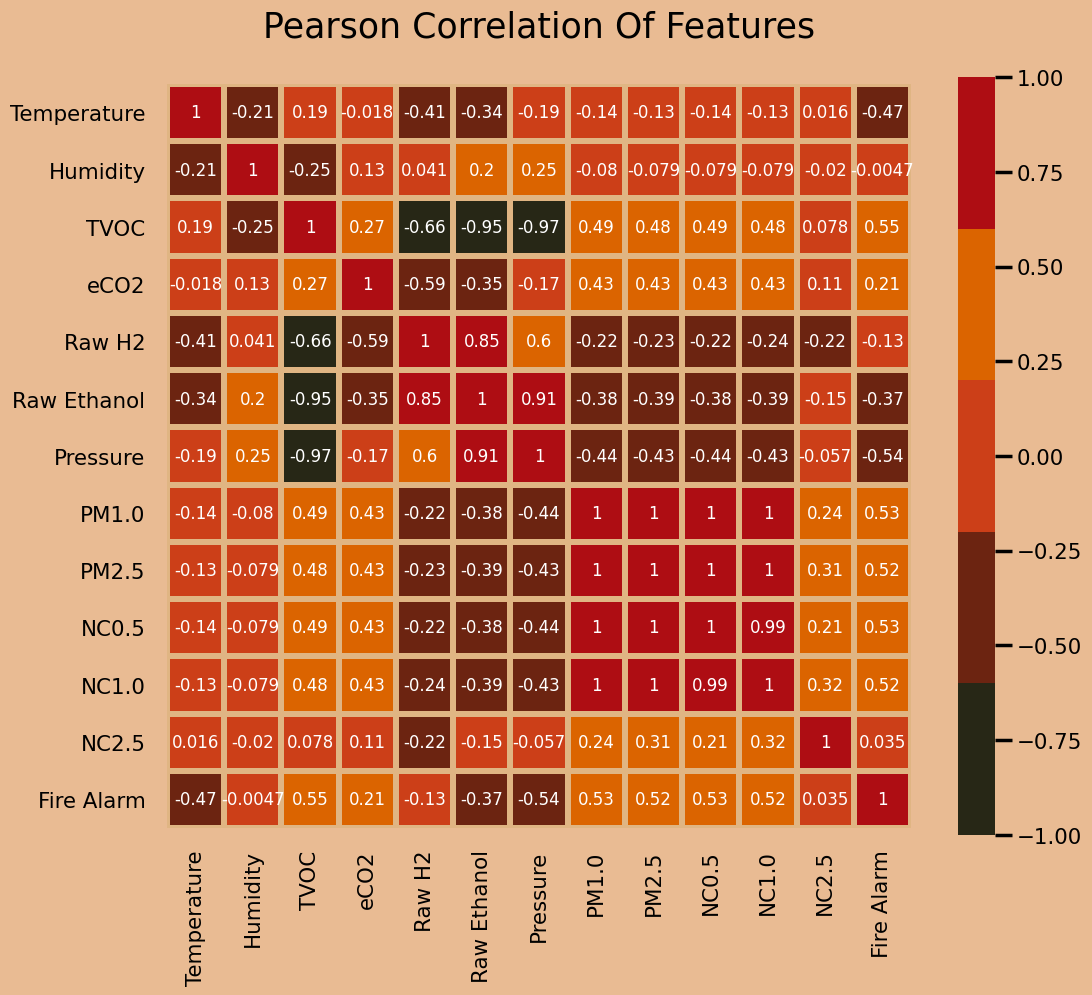

In [30]:
catcol = [col for col in data.columns if data[col].dtype == "object"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(12, 12))

sns.heatmap(data.corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82),
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='#e0b583',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [31]:
x = data.drop(["Fire Alarm"],axis =1)
y = data["Fire Alarm"]

sc = StandardScaler()
x = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (18032, 12), (18032,)
Shape of testing data : (4508, 12), (4508,)


In [37]:
from sklearn.impute import SimpleImputer

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)
gnb = GaussianNB()
gnb.fit(x_train_imputed, y_train)
gnb_pred = gnb.predict(x_test_imputed)
gnb_conf = confusion_matrix(y_test, gnb_pred)
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred) * 100, 2)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")


Confusion Matrix : 

[[ 610    2]
 [   0 3896]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00      3896

    accuracy                           1.00      4508
   macro avg       1.00      1.00      1.00      4508
weighted avg       1.00      1.00      1.00      4508


The Accuracy of Gaussian Naive Bayes is 99.96 %


In [40]:
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)
lr = LogisticRegression()
lr.fit(x_train_imputed, y_train)
lr_pred = lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

Confusion Matrix : 

[[ 612    0]
 [   0 3896]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00      3896

    accuracy                           1.00      4508
   macro avg       1.00      1.00      1.00      4508
weighted avg       1.00      1.00      1.00      4508


The Accuracy of Logistic Regression is 100.0 %


In [42]:
bnb = BernoulliNB()
bnb.fit(x_train_imputed, y_train)
bnb_pred = bnb.predict(x_test)
bnb_conf = confusion_matrix(y_test, bnb_pred)
bnb_report = classification_report(y_test, bnb_pred)
bnb_acc = round(accuracy_score(y_test, bnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{bnb_conf}")
print(f"\nClassification Report : \n\n{bnb_report}")
print(f"\nThe Accuracy of Bernoulli Naive Bayes is {bnb_acc} %")

Confusion Matrix : 

[[ 609    3]
 [ 752 3144]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.45      1.00      0.62       612
           1       1.00      0.81      0.89      3896

    accuracy                           0.83      4508
   macro avg       0.72      0.90      0.76      4508
weighted avg       0.92      0.83      0.86      4508


The Accuracy of Bernoulli Naive Bayes is 83.25 %


In [43]:
svm = SVC(C = 100, gamma = 0.002)
svm.fit(x_train_imputed, y_train)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[ 612    0]
 [   0 3896]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00      3896

    accuracy                           1.00      4508
   macro avg       1.00      1.00      1.00      4508
weighted avg       1.00      1.00      1.00      4508


The Accuracy of Support Vector Machine is 100.0 %


In [45]:
rfg = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfg.fit(x_train_imputed, y_train)
rfg_pred = rfg.predict(x_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

Confusion Matrix : 

[[ 612    0]
 [   0 3896]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00      3896

    accuracy                           1.00      4508
   macro avg       1.00      1.00      1.00      4508
weighted avg       1.00      1.00      1.00      4508


The Accuracy of Random Forest Classifier is 100.0 %


In [46]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_imputed, y_train)
knn_pred = knn.predict(x_test)
knn_conf = confusion_matrix(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")

Confusion Matrix : 

[[ 612    0]
 [   0 3896]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00      3896

    accuracy                           1.00      4508
   macro avg       1.00      1.00      1.00      4508
weighted avg       1.00      1.00      1.00      4508


The Accuracy of K Nearest Neighbors Classifier is 100.0 %


In [47]:
xgb = XGBClassifier(use_label_encoder = False)
xgb.fit(x_train_imputed, y_train)
xgb_pred = xgb.predict(x_test)
xgb_conf = confusion_matrix(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)
xgb_acc = round(accuracy_score(y_test, xgb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{xgb_conf}")
print(f"\nClassification Report : \n\n{xgb_report}")
print(f"\nThe Accuracy of Extreme Gradient Boosting Classifier is {xgb_acc} %")

Confusion Matrix : 

[[ 612    0]
 [   0 3896]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00      3896

    accuracy                           1.00      4508
   macro avg       1.00      1.00      1.00      4508
weighted avg       1.00      1.00      1.00      4508


The Accuracy of Extreme Gradient Boosting Classifier is 100.0 %


In [48]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

regularization_parameter = 0.003

neural_model = Sequential([tf.keras.layers.Dense(units=32, input_dim=(x_train.shape[-1]), activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=64, activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=128, activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dropout(0.3),
                    tf.keras.layers.Dense(units=16,activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=1, activation="sigmoid")
                    ])

print(neural_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                2064      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12929 (50.50 KB)
Trainable params: 12929 (

In [49]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy") == 1.0):
            print("\nAccuracy is 100% so canceling training!")
            self.model.stop_training = True

callbacks = myCallback()


neural_model.compile(optimizer = Adam(learning_rate = 0.001),
                     loss = "binary_crossentropy",
                     metrics = ["accuracy"])

history = neural_model.fit(x_train, y_train,
                           epochs = 150,
                           verbose = 1,
                           batch_size = 64,
                           validation_data = (x_test, y_test),
                           callbacks = [callbacks])

Epoch 1/150
282/282 [==============================] - 6s 10ms/step - loss: nan - accuracy: 0.1661 - val_loss: nan - val_accuracy: 0.1358
Epoch 2/150
282/282 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1423 - val_loss: nan - val_accuracy: 0.1358
Epoch 3/150
282/282 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1423 - val_loss: nan - val_accuracy: 0.1358
Epoch 4/150
282/282 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1423 - val_loss: nan - val_accuracy: 0.1358
Epoch 5/150
282/282 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1423 - val_loss: nan - val_accuracy: 0.1358
Epoch 6/150
282/282 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1423 - val_loss: nan - val_accuracy: 0.1358
Epoch 7/150
282/282 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1423 - val_loss: nan - val_accuracy: 0.1358
Epoch 8/150
282/282 [===================

Let's have a look on the performance of neural network architecture :


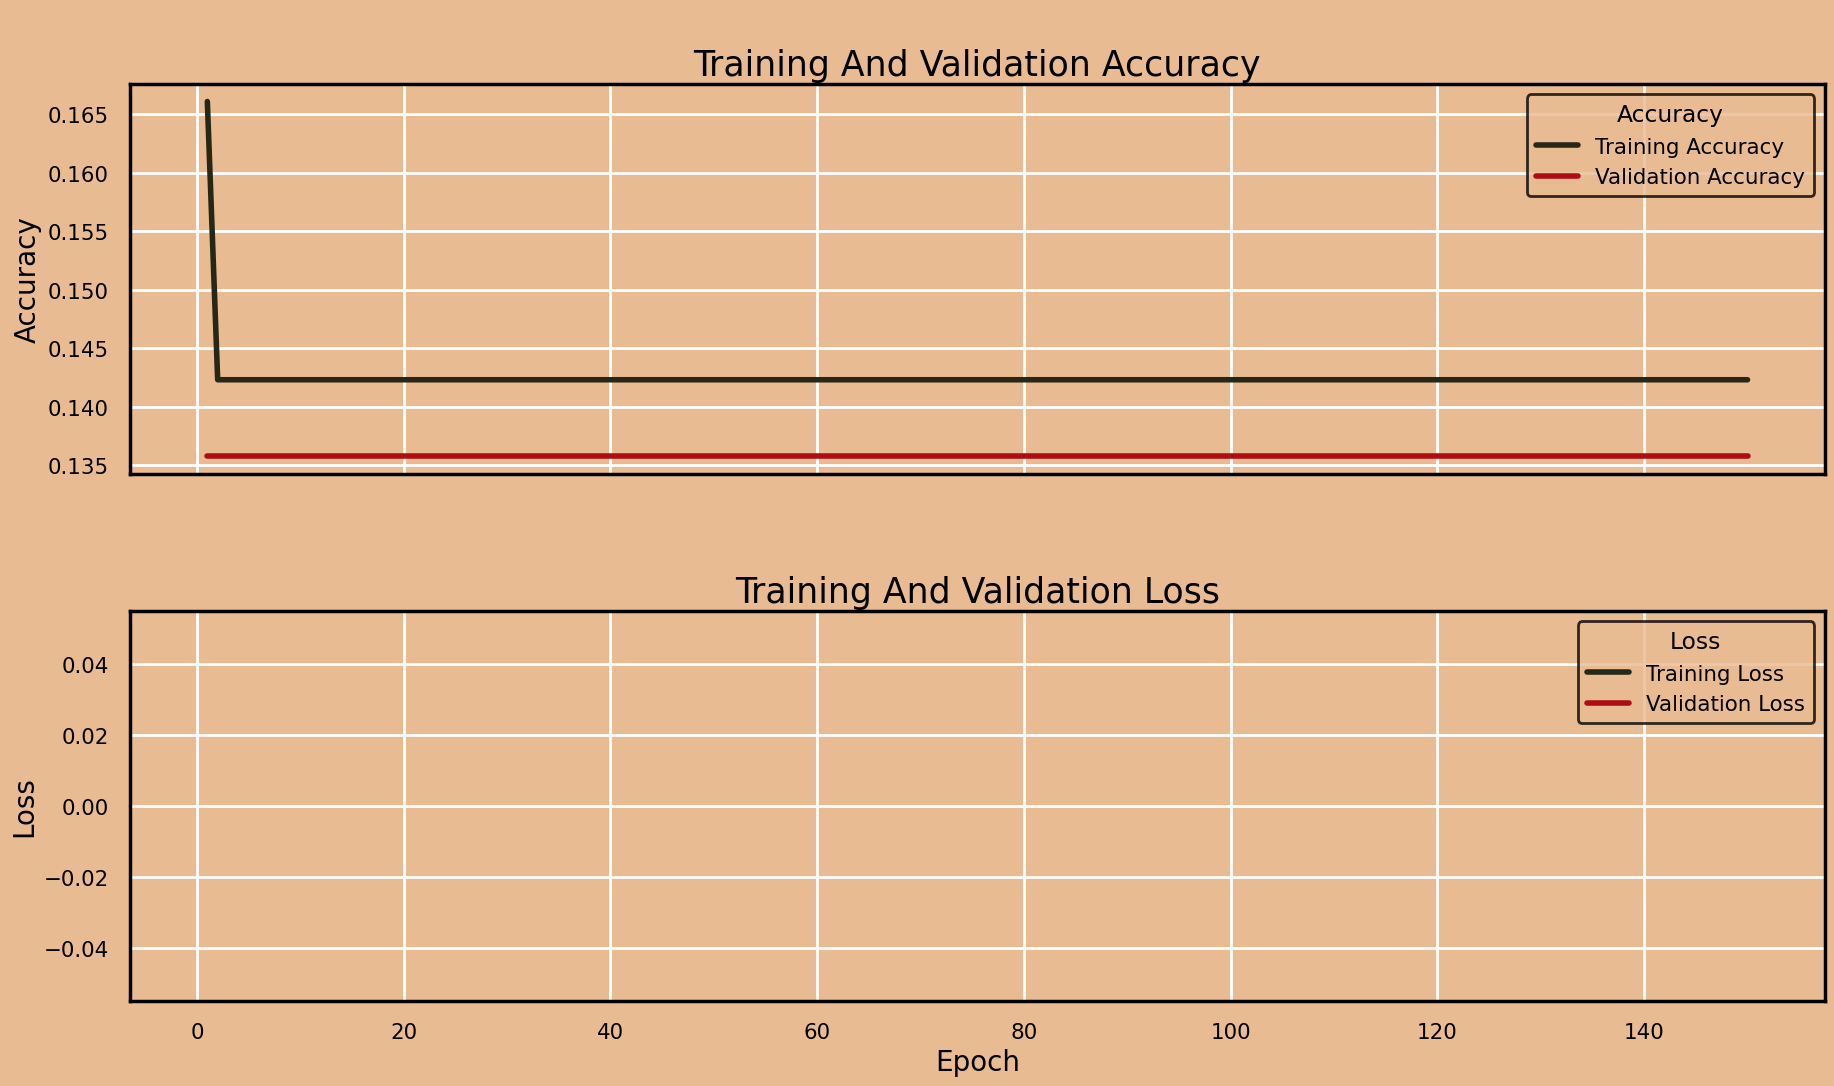

In [50]:
# acc = history.history["accuracy"]
# val_acc = history.history["val_accuracy"]
# loss = history.history["loss"]
# val_loss = history.history["val_loss"]

performance = pd.DataFrame(history.history)
performance["Epoch"] = range(1,len(history.history["accuracy"])+1)    # number of epochs
performance.rename(columns={"loss": "Training Loss","accuracy": "Training Accuracy","val_loss":"Validation Loss","val_accuracy":"Validation Accuracy"}, inplace = True)


print(f"Let's have a look on the performance of neural network architecture :")
_, axs = plt.subplots(2,1,figsize=(20,12), sharex=True)
plt.tight_layout(pad=5.0)

sns.lineplot(data=performance,x="Epoch",y="Training Accuracy",ax=axs[0],color=palette[0],alpha=1,linewidth=4)
sns.lineplot(data=performance,x="Epoch",y="Validation Accuracy",ax=axs[0],color=palette[2],alpha=1,linewidth=4)
axs[0].set_title("\nTraining And Validation Accuracy",fontsize=25)
axs[0].set_ylabel("Accuracy",fontsize=20)
axs[0].set_xlabel("Epoch",fontsize=20)
axs[0].legend(["Training Accuracy","Validation Accuracy"],title="Accuracy")

sns.lineplot(data=performance,x="Epoch",y="Training Loss",ax=axs[1],color=palette[0],alpha=1,linewidth=4)
sns.lineplot(data=performance,x="Epoch",y="Validation Loss",ax=axs[1],color=palette[2],alpha=1,linewidth=4)
axs[1].set_title("\nTraining And Validation Loss",fontsize=25)
axs[1].set_ylabel("Loss",fontsize=20)
axs[1].set_xlabel("Epoch",fontsize=20)
axs[1].legend(["Training Loss","Validation Loss"],title="Loss")

plt.show()